In [1]:
import anndata as ad             # For reading/writing AnnData files
import matplotlib.pyplot as plt  # For plotting
import metacells as mc           # The Metacells package
import numpy as np               # For array/matrix operations
import pandas as pd              # For data frames
import os                        # For filesystem operations
import seaborn as sb             # For plotting
import scipy.sparse as sp        # For sparse matrices
import shutil                    # for filesystem operations
from math import hypot           # For plotting
from typing import * 

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [44]:
adata = ad.read_h5ad("Great_Ape_MTG_public/rhesus_cellxgene_obs.h5ad")

In [45]:
adata.obs

orig.ident  nCount_RNA  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10   SeuratProject      3513.0   
AAACCCACAAACACCT-1L8TX_191119_01_A10   SeuratProject      7556.0   
AAACCCACATCAACCA-1L8TX_191119_01_A10   SeuratProject      5511.0   
AAACGAACATCCAACA-1L8TX_191119_01_A10   SeuratProject      6197.0   
AAACGAACATGTCTAG-1L8TX_191119_01_A10   SeuratProject      3814.0   
...                                              ...         ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  SeuratProject      7312.0   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  SeuratProject     10384.0   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  SeuratProject      8133.0   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  SeuratProject      6893.0   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  SeuratProject      7961.0   

                                       nFeature_RNA  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10         1992.0   
AAACCCACAAACACCT-1L8TX_191119_01_A10         2788.0   
AAACCCACATCAACCA-1L8TX_191119_01_A10         2453.0   
AAACGAACATCCAACA-1L8TX_191119_01_A10         2584.0   
AAACGAACATGTCTAG-1L8TX_191119_01_A10         2020.0   
...                                             ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02        3703.0   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02        4663.0   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02        4022.0   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02        3609.0   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02        3794.0   

                                                                        ...1  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10    AAACCCAAGATCACCT-1L8TX_191119_01_A10   
AAACCCACAAACACCT-1L8TX_191119_01_A10    AAACCCACAAACACCT-1L8TX_191119_01_A10   
AAACCCACATCAACCA-1L8TX_191119_01_A10    AAACCCACATCAACCA-1L8TX_191119_01_A10   
AAACGAACATCCAACA-1L8TX_191119_01_A10    AAACGAACATCCAACA-1L8TX_191119_01_A10   
AAACGAACATGTCTAG-1L8TX_191119_01_A10    AAACGAACATGTCTAG-1L8TX_191119_01_A10   
...                                                                      ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  TTTGGTTAGGATATGT-12L8TX_191126_01_D02   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  TTTGGTTCAACATCGT-12L8TX_191126_01_D02   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  TTTGTTGCAGACGGAT-12L8TX_191126_01_D02   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02   

                                       Cluster Neighborhood Subclass  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10   Oligo_1         glia    Oligo   
AAACCCACAAACACCT-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
AAACCCACATCAACCA-1L8TX_191119_01_A10     OPC_2         glia      OPC   
AAACGAACATCCAACA-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
AAACGAACATGTCTAG-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
...                                        ...          ...      ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  L5 IT_4     it_types    L5 IT   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  L4 IT_2     it_types    L4 IT   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   

                                      CrossSpeciesCluster  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10              Oligo_1   
AAACCCACAAACACCT-1L8TX_191119_01_A10              Oligo_1   
AAACCCACATCAACCA-1L8TX_191119_01_A10                OPC_2   
AAACGAACATCCAACA-1L8TX_191119_01_A10              Oligo_1   
AAACGAACATGTCTAG-1L8TX_191119_01_A10              Oligo_1   
...                                                   ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02             L4 IT_1   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02             L5 IT_2   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02             L4 IT_2   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02             L4 IT_1   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02             L4 IT_1   

     

In [46]:
adata.var.head()

name
PGBD2                PGBD2
LOC114674980  LOC114674980
TRNAE-CUC        TRNAE-CUC
ZNF692              ZNF692
TRNAL-CAA        TRNAL-CAA

In [47]:
adata

AnnData object with n_obs × n_vars = 89136 × 40280
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', '...1', 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_id'
    var: 'name'

In [87]:
sc.pp.calculate_qc_metrics(adata, log1p=False, inplace=True)

In [97]:
adata.var.loc[adata.var.total_counts == 0]

# exclude 8676 0 count genes

name  n_cells_by_counts  mean_counts  \
TRNAE-CUC        TRNAE-CUC                  0          0.0   
LOC114678409  LOC114678409                  0          0.0   
LOC106995347  LOC106995347                  0          0.0   
LOC706213        LOC706213                  0          0.0   
LOC100431025  LOC100431025                  0          0.0   
...                    ...                ...          ...   
LOC114676099  LOC114676099                  0          0.0   
LOC114676100  LOC114676100                  0          0.0   
LOC114676101  LOC114676101                  0          0.0   
ND3                    ND3                  0          0.0   
ND4L                  ND4L                  0          0.0   

              pct_dropout_by_counts  total_counts  
TRNAE-CUC                     100.0           0.0  
LOC114678409                  100.0           0.0  
LOC106995347                  100.0           0.0  
LOC706213                     100.0           0.0  
LOC100431025                  100.0           0.0  
...                             ...           ...  
LOC114676099                  100.0           0.0  
LOC114676100                  100.0           0.0  
LOC114676101                  100.0           0.0  
ND3                           100.0           0.0  
ND4L                          100.0           0.0  

[8676 rows x 5 columns]

In [48]:
adata.X.max()

2216.0

In [51]:
adata.obs['assay'].value_counts()

assay
10x 3' v3    89136
Name: count, dtype: int64

In [52]:
adata_10x = adata[adata.obs.assay == '10x 3\' v3']

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [53]:
adata_10x.obs

orig.ident  nCount_RNA  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10   SeuratProject      3513.0   
AAACCCACAAACACCT-1L8TX_191119_01_A10   SeuratProject      7556.0   
AAACCCACATCAACCA-1L8TX_191119_01_A10   SeuratProject      5511.0   
AAACGAACATCCAACA-1L8TX_191119_01_A10   SeuratProject      6197.0   
AAACGAACATGTCTAG-1L8TX_191119_01_A10   SeuratProject      3814.0   
...                                              ...         ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  SeuratProject      7312.0   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  SeuratProject     10384.0   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  SeuratProject      8133.0   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  SeuratProject      6893.0   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  SeuratProject      7961.0   

                                       nFeature_RNA  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10         1992.0   
AAACCCACAAACACCT-1L8TX_191119_01_A10         2788.0   
AAACCCACATCAACCA-1L8TX_191119_01_A10         2453.0   
AAACGAACATCCAACA-1L8TX_191119_01_A10         2584.0   
AAACGAACATGTCTAG-1L8TX_191119_01_A10         2020.0   
...                                             ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02        3703.0   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02        4663.0   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02        4022.0   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02        3609.0   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02        3794.0   

                                                                        ...1  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10    AAACCCAAGATCACCT-1L8TX_191119_01_A10   
AAACCCACAAACACCT-1L8TX_191119_01_A10    AAACCCACAAACACCT-1L8TX_191119_01_A10   
AAACCCACATCAACCA-1L8TX_191119_01_A10    AAACCCACATCAACCA-1L8TX_191119_01_A10   
AAACGAACATCCAACA-1L8TX_191119_01_A10    AAACGAACATCCAACA-1L8TX_191119_01_A10   
AAACGAACATGTCTAG-1L8TX_191119_01_A10    AAACGAACATGTCTAG-1L8TX_191119_01_A10   
...                                                                      ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  TTTGGTTAGGATATGT-12L8TX_191126_01_D02   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  TTTGGTTCAACATCGT-12L8TX_191126_01_D02   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  TTTGTTGCAGACGGAT-12L8TX_191126_01_D02   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02   

                                       Cluster Neighborhood Subclass  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10   Oligo_1         glia    Oligo   
AAACCCACAAACACCT-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
AAACCCACATCAACCA-1L8TX_191119_01_A10     OPC_2         glia      OPC   
AAACGAACATCCAACA-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
AAACGAACATGTCTAG-1L8TX_191119_01_A10   Oligo_2         glia    Oligo   
...                                        ...          ...      ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02  L5 IT_4     it_types    L5 IT   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02  L4 IT_2     it_types    L4 IT   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02  L4 IT_1     it_types    L4 IT   

                                      CrossSpeciesCluster  \
AAACCCAAGATCACCT-1L8TX_191119_01_A10              Oligo_1   
AAACCCACAAACACCT-1L8TX_191119_01_A10              Oligo_1   
AAACCCACATCAACCA-1L8TX_191119_01_A10                OPC_2   
AAACGAACATCCAACA-1L8TX_191119_01_A10              Oligo_1   
AAACGAACATGTCTAG-1L8TX_191119_01_A10              Oligo_1   
...                                                   ...   
TTTGGTTAGGATATGT-12L8TX_191126_01_D02             L4 IT_1   
TTTGGTTCAACATCGT-12L8TX_191126_01_D02             L5 IT_2   
TTTGTTGCAGACGGAT-12L8TX_191126_01_D02             L4 IT_2   
TTTGTTGTCGAGAGCA-12L8TX_191126_01_D02             L4 IT_1   
TTTGTTGTCTGCAGCG-12L8TX_191126_01_D02             L4 IT_1   

     

In [54]:
adata_10x_raw = adata_10x

In [56]:
full = adata_10x_raw
mc.ut.top_level(full)
mc.ut.set_name(full, "macaque_mtg_full")
print(f"Full: {full.n_obs} cells, {full.n_vars} genes")

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/contextlib.py:144: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


Full: 89136 cells, 40280 genes


In [57]:
PROPERLY_SAMPLED_MIN_CELL_TOTAL = 200
PROPERLY_SAMPLED_MAX_CELL_TOTAL = 200000

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


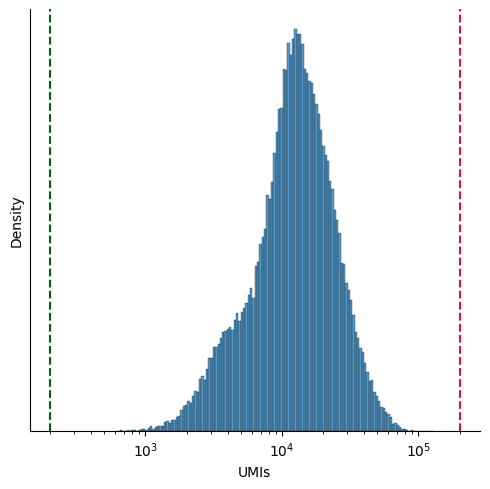

In [58]:
total_umis_per_cell = mc.ut.get_o_numpy(full, "__x__", sum=True)
plot = sb.displot(total_umis_per_cell, log_scale=(10, None))
plot.set(xlabel="UMIs", ylabel="Density", yticks=[])

plot.refline(x=PROPERLY_SAMPLED_MIN_CELL_TOTAL, color="darkgreen")
plot.refline(x=PROPERLY_SAMPLED_MAX_CELL_TOTAL, color="crimson")

In [59]:
## since the data is filtered by cellxgene and the author I do not exclude any cell types here

In [60]:
too_small_cells_count = np.sum(total_umis_per_cell < PROPERLY_SAMPLED_MIN_CELL_TOTAL)
too_large_cells_count = np.sum(total_umis_per_cell > PROPERLY_SAMPLED_MAX_CELL_TOTAL)

total_umis_per_cell = mc.ut.get_o_numpy(full, name="__x__", sum=True)
too_small_cells_percent = 100.0 * too_small_cells_count / full.n_obs
too_large_cells_percent = 100.0 * too_large_cells_count / full.n_vars

print(
    f"Will exclude {too_small_cells_count} ({too_small_cells_percent:.2f}%%) cells"
    f" with less than {PROPERLY_SAMPLED_MIN_CELL_TOTAL} UMIs"
)
print(
    f"Will exclude {too_large_cells_count} ({too_large_cells_percent:.2f}%%) cells"
    f" with more than {PROPERLY_SAMPLED_MAX_CELL_TOTAL} UMIs"
)

Will exclude 0 (0.00%%) cells with less than 200 UMIs
Will exclude 0 (0.00%%) cells with more than 200000 UMIs


In [61]:
EXCLUDED_GENE_NAMES = ["XIST", "MALAT1"]  # Sex-specific genes.
EXCLUDED_GENE_PATTERNS = ["MT-.*"]  

In [82]:
full.var

name  bursty_lonely_gene  properly_sampled_gene  \
PGBD2                PGBD2               False                   True   
LOC114674980  LOC114674980               False                   True   
TRNAE-CUC        TRNAE-CUC               False                  False   
ZNF692              ZNF692               False                   True   
TRNAL-CAA        TRNAL-CAA               False                   True   
...                    ...                 ...                    ...   
ND4L                  ND4L               False                  False   
ND4                    ND4               False                   True   
ND5                    ND5               False                   True   
ND6                    ND6               False                   True   
CYTB                  CYTB               False                   True   

              excluded_gene  
PGBD2                 False  
LOC114674980          False  
TRNAE-CUC              True  
ZNF692                False  
TRNAL-CAA             False  
...                     ...  
ND4L                   True  
ND4                   False  
ND5                   False  
ND6                   False  
CYTB                  False  

[40280 rows x 4 columns]

In [71]:
full

AnnData object with n_obs × n_vars = 89136 × 40280
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', '...1', 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_id', 'excluded_umis'
    var: 'name', 'bursty_lonely_gene', 'properly_sampled_gene', 'excluded_gene'
    uns: '__name__'

In [63]:
mc.pl.exclude_genes(
    full,
    excluded_gene_names=EXCLUDED_GENE_NAMES, 
    excluded_gene_patterns=EXCLUDED_GENE_PATTERNS,
    properly_sampled_min_gene_total=1, ##get genes with at least one count,however still removed quite a bit of genes
    random_seed=123456,
)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set macaque_mtg_full.var[bursty_lonely_gene]: 0 true (0%) out of 40280 bools
set macaque_mtg_full.var[properly_sampled_gene]: 31604 true (78.46%) out of 40280 bools
set macaque_mtg_full.var[excluded_gene]: 8676 true (21.54%) out of 40280 bools


In [99]:
full.var.loc[full.var.properly_sampled_gene]

name  bursty_lonely_gene  properly_sampled_gene  \
PGBD2                PGBD2               False                   True   
LOC114674980  LOC114674980               False                   True   
ZNF692              ZNF692               False                   True   
TRNAL-CAA        TRNAL-CAA               False                   True   
LOC114678402  LOC114678402               False                   True   
...                    ...                 ...                    ...   
COX3                  COX3               False                   True   
ND4                    ND4               False                   True   
ND5                    ND5               False                   True   
ND6                    ND6               False                   True   
CYTB                  CYTB               False                   True   

              excluded_gene  
PGBD2                 False  
LOC114674980          False  
ZNF692                False  
TRNAL-CAA             False  
LOC114678402          False  
...                     ...  
COX3                  False  
ND4                   False  
ND5                   False  
ND6                   False  
CYTB                  False  

[31604 rows x 4 columns]

In [73]:
mc.tl.compute_excluded_gene_umis(full)

set macaque_mtg_full.obs[excluded_umis]: 89136 float32s


In [74]:
PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION = 0.20


/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Will exclude 0 (0.00%) cells with more than 20.00% excluded gene UMIs


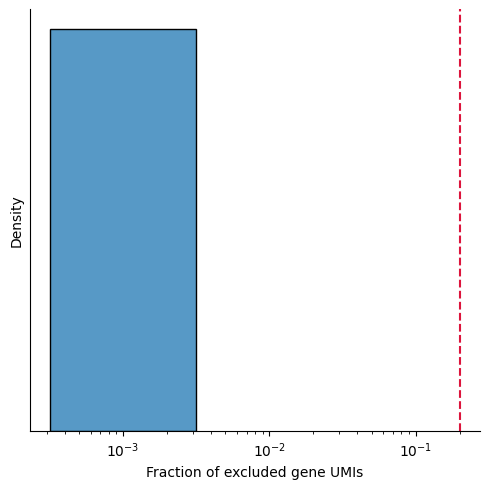

In [75]:
excluded_umis_fraction_regularization = 1e-3  # Avoid 0 values in log scale plot.
excluded_umis_per_cell = mc.ut.get_o_numpy(full, "excluded_umis")
excluded_umis_fraction_per_cell = excluded_umis_per_cell / total_umis_per_cell

excluded_umis_fraction_per_cell += excluded_umis_fraction_regularization
plot = sb.displot(excluded_umis_fraction_per_cell, log_scale=(10, None))
excluded_umis_fraction_per_cell -= excluded_umis_fraction_regularization

plot.set(xlabel="Fraction of excluded gene UMIs", ylabel="Density", yticks=[])
plot.refline(x=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION, color="crimson")

too_excluded_cells_count = np.sum(
    excluded_umis_fraction_per_cell > PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION
)
too_excluded_cells_fraction = too_excluded_cells_count / len(total_umis_per_cell)

print(
    f"Will exclude {too_excluded_cells_count} ({100 * too_excluded_cells_fraction:.2f}%) cells"
    f" with more than {100 * PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION:.2f}% excluded gene UMIs"
)

In [83]:
## all excluded genes are 0 count genes

In [84]:
## again do not exclude any cells

In [85]:
mc.pl.exclude_cells(
    full,
    properly_sampled_min_cell_total=PROPERLY_SAMPLED_MIN_CELL_TOTAL,
    properly_sampled_max_cell_total=PROPERLY_SAMPLED_MAX_CELL_TOTAL,
    properly_sampled_max_excluded_genes_fraction=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION,
)

set macaque_mtg_full.obs[properly_sampled_cell]: 89136 true (100%) out of 89136 bools
set macaque_mtg_full.obs[excluded_cell]: 0 true (0%) out of 89136 bools


In [86]:
full.var

name  bursty_lonely_gene  properly_sampled_gene  \
PGBD2                PGBD2               False                   True   
LOC114674980  LOC114674980               False                   True   
TRNAE-CUC        TRNAE-CUC               False                  False   
ZNF692              ZNF692               False                   True   
TRNAL-CAA        TRNAL-CAA               False                   True   
...                    ...                 ...                    ...   
ND4L                  ND4L               False                  False   
ND4                    ND4               False                   True   
ND5                    ND5               False                   True   
ND6                    ND6               False                   True   
CYTB                  CYTB               False                   True   

              excluded_gene  
PGBD2                 False  
LOC114674980          False  
TRNAE-CUC              True  
ZNF692                False  
TRNAL-CAA             False  
...                     ...  
ND4L                   True  
ND4                   False  
ND5                   False  
ND6                   False  
CYTB                  False  

[40280 rows x 4 columns]

In [89]:
clean = mc.pl.extract_clean_data(full, name="macaque_mtg_clean")
mc.ut.top_level(clean)
print(f"Clean: {clean.n_obs} cells, {clean.n_vars} genes")

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set macaque_mtg_clean.obs[full_cell_index]: 89136 int32s
set macaque_mtg_clean.var[full_gene_index]: 31604 int32s


Clean: 89136 cells, 31604 genes


In [90]:
full.write_h5ad("macaque_full.h5ad")

In [91]:
clean.write_h5ad("macaque_clean.h5ad")

In [3]:
clean=sc.read_h5ad("metacells/macaque_clean.h5ad")

In [4]:
clean

AnnData object with n_obs × n_vars = 89136 × 31604
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', '...1', 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_id', 'excluded_umis', 'properly_sampled_cell', 'excluded_cell', 'full_cell_index'
    var: 'name', 'bursty_lonely_gene', 'properly_sampled_gene', 'excluded_gene', 'full_gene_index'
    uns: '__name__'

In [5]:
BASE_LATERAL_GENE_NAMES = [
    "AURKA", "MCM3", "MCM4", "MCM7", "MKI67", "PCNA", "RRM2", "SMC4", "TPX2",  # Cell-cycle
    "FOS", "HSP90AB1", "TXN",                                                  # Stress
]
BASE_LATERAL_GENE_PATTERNS = ["RP[LS].*"]  # Ribosomal

In [6]:
cells = clean
clean = None  # Allow it to be gc-ed
mc.ut.set_name(cells, "macaque_mtg_iteration1")
print(f"Iteration 1: {cells.n_obs} cells, {cells.n_vars} genes")

Iteration 1: 89136 cells, 31604 genes


In [7]:
# We'll reuse this through the iterations.
# It is just a thin wrapper for mark_lateral_genes,
# and optionally also shows the results.
def update_lateral_genes(
    *,
    names: List[str] = [],
    patterns: List[str] = [],
    op: str = "set",
    show: bool = True
) -> None:
    mc.pl.mark_lateral_genes(
        cells,
        lateral_gene_names=names,
        lateral_gene_patterns=patterns,
        op=op
    )

    if not show:
        return
    
    lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
    lateral_gene_names = set(cells.var_names[lateral_genes_mask])
    
    print(sorted([
        name for name in lateral_gene_names
        if not name.startswith("RPL") and not name.startswith("RPS")
    ]))

    print(f"""and {len([
        name for name in lateral_gene_names if name.startswith("RPL") or name.startswith("RPS")
    ])} RP[LS].* genes""")

update_lateral_genes(names=BASE_LATERAL_GENE_NAMES, patterns=BASE_LATERAL_GENE_PATTERNS)

set macaque_mtg_iteration1.var[lateral_gene]: 104 true (0.3291%) out of 31604 bools


['AURKA', 'FOS', 'HSP90AB1', 'MCM3', 'MCM4', 'MCM7', 'MKI67', 'PCNA', 'RRM2', 'SMC4', 'TPX2', 'TXN']
and 92 RP[LS].* genes


In [8]:
mc.pl.relate_to_lateral_genes(cells, random_seed=123456)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set macaque_mtg_iteration1.var[lateral_genes_module]: 23744 outliers (75.13%) and 7860 grouped (24.87%) out of 31604 int32 elements with 213 groups with mean size 36.9
set macaque_mtg_iteration1.varp[lateral_genes_similarity]: csr_matrix 31604 X 31604 float32s (61779600 > 0, 6.185%)


In [9]:
base_lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
base_lateral_gene_names = set(cells.var_names[base_lateral_genes_mask])

module_per_gene = mc.ut.get_v_series(cells, "lateral_genes_module")
base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = set(base_lateral_gene_modules[base_lateral_gene_modules >= 0])

genes_per_module = np.unique(module_per_gene.values, return_counts=True)[1][1:]
similarity_of_modules = mc.ut.get_vv_proper(cells, "lateral_genes_similarity")
similarity_of_modules = mc.ut.sum_groups(similarity_of_modules, module_per_gene.values, per="row")[0]
similarity_of_modules = mc.ut.to_layout(similarity_of_modules, layout="column_major")
similarity_of_modules = \
    mc.ut.sum_groups(similarity_of_modules, module_per_gene.values, per="column")[0]
similarity_of_modules /= genes_per_module[:, np.newaxis] * genes_per_module[np.newaxis, :]

module_names = [
    f"(*) {gene_module}" if gene_module in base_lateral_gene_modules else str(gene_module)
    for gene_module in range(np.max(module_per_gene.values) + 1)
]
similarity_of_modules = pd.DataFrame(similarity_of_modules, index=module_names, columns=module_names)

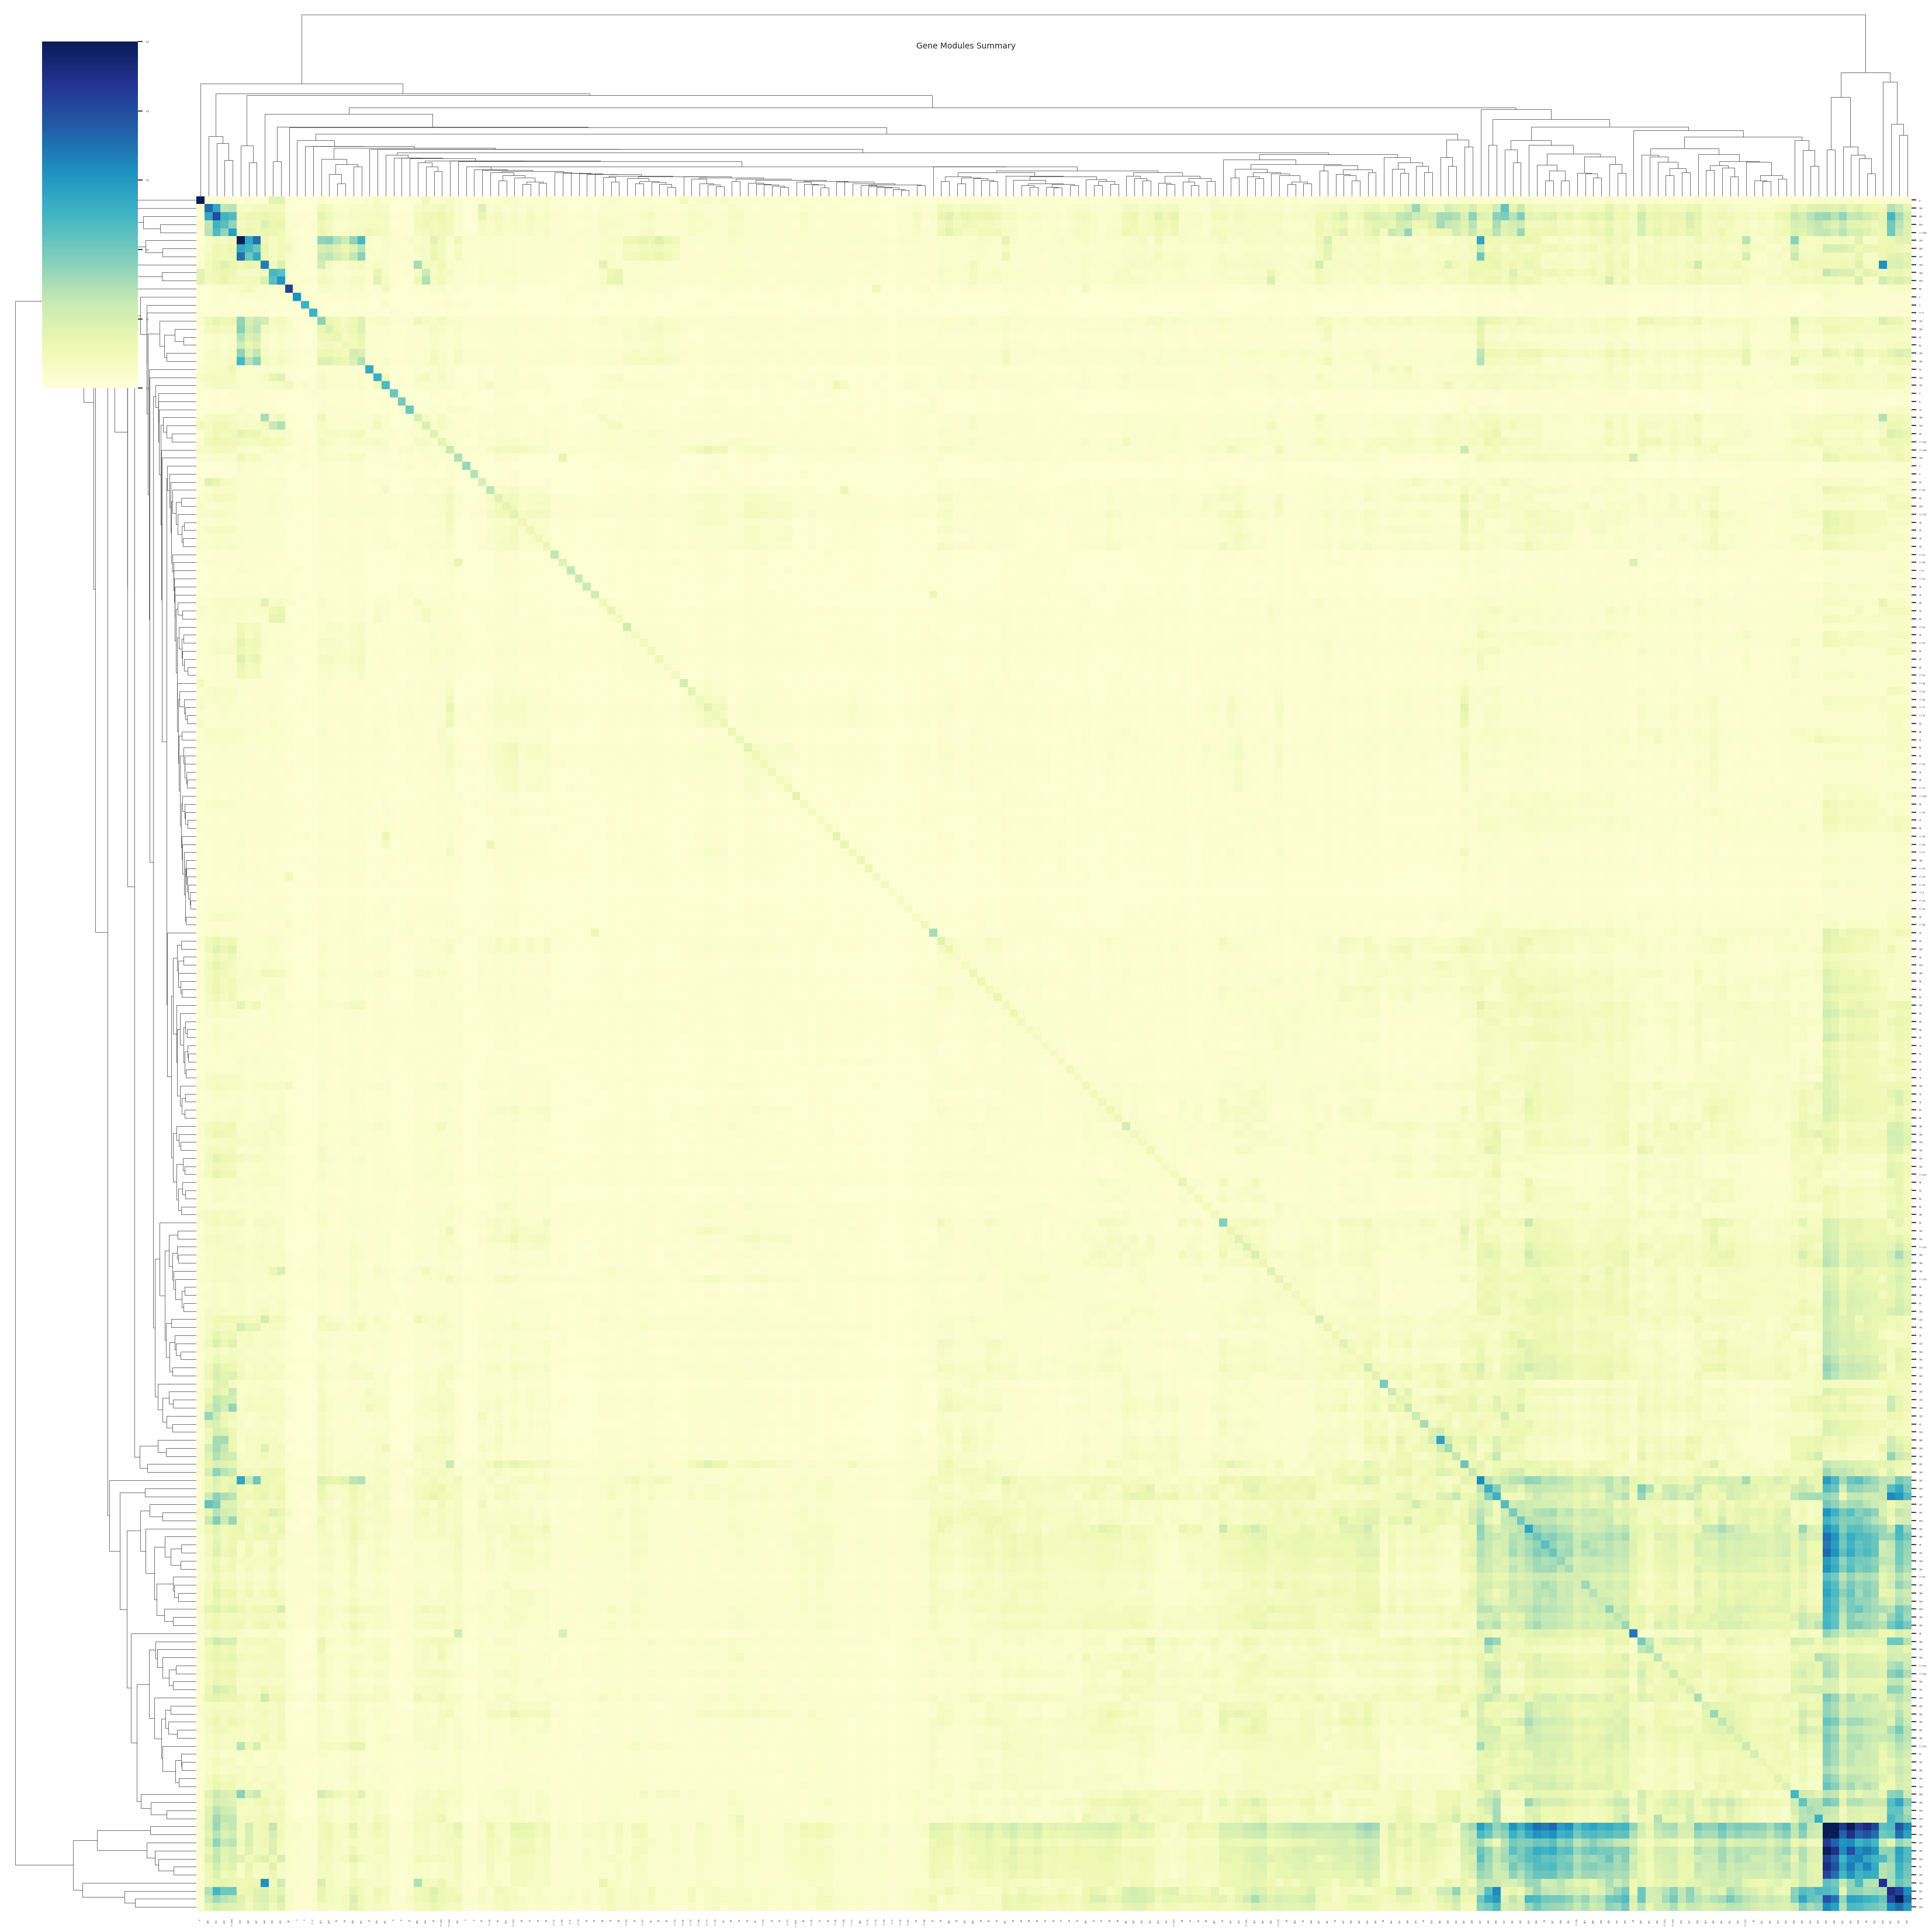

In [10]:
size = similarity_of_modules.shape[0]
if size > 50:
    sb.set(font_scale=50 / size)
size = size * 0.15 + 1
cm = sb.clustermap(
    similarity_of_modules,
    figsize=(size, size),
    vmin=0, vmax=0.5,
    xticklabels=True, yticklabels=True,
    dendrogram_ratio=0.1,
    cmap="YlGnBu",
)
cm.fig.suptitle("Gene Modules Summary", fontsize=10)

plt.show()

<Figure size 175x175 with 0 Axes>

<Figure size 190x190 with 0 Axes>

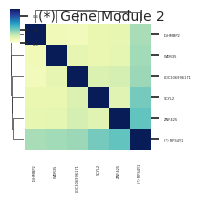

<Figure size 160x160 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 250x250 with 0 Axes>

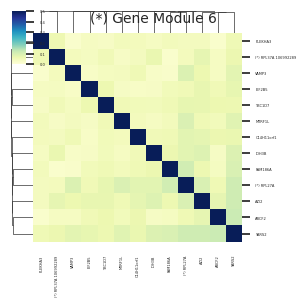

<Figure size 220x220 with 0 Axes>

<Figure size 190x190 with 0 Axes>

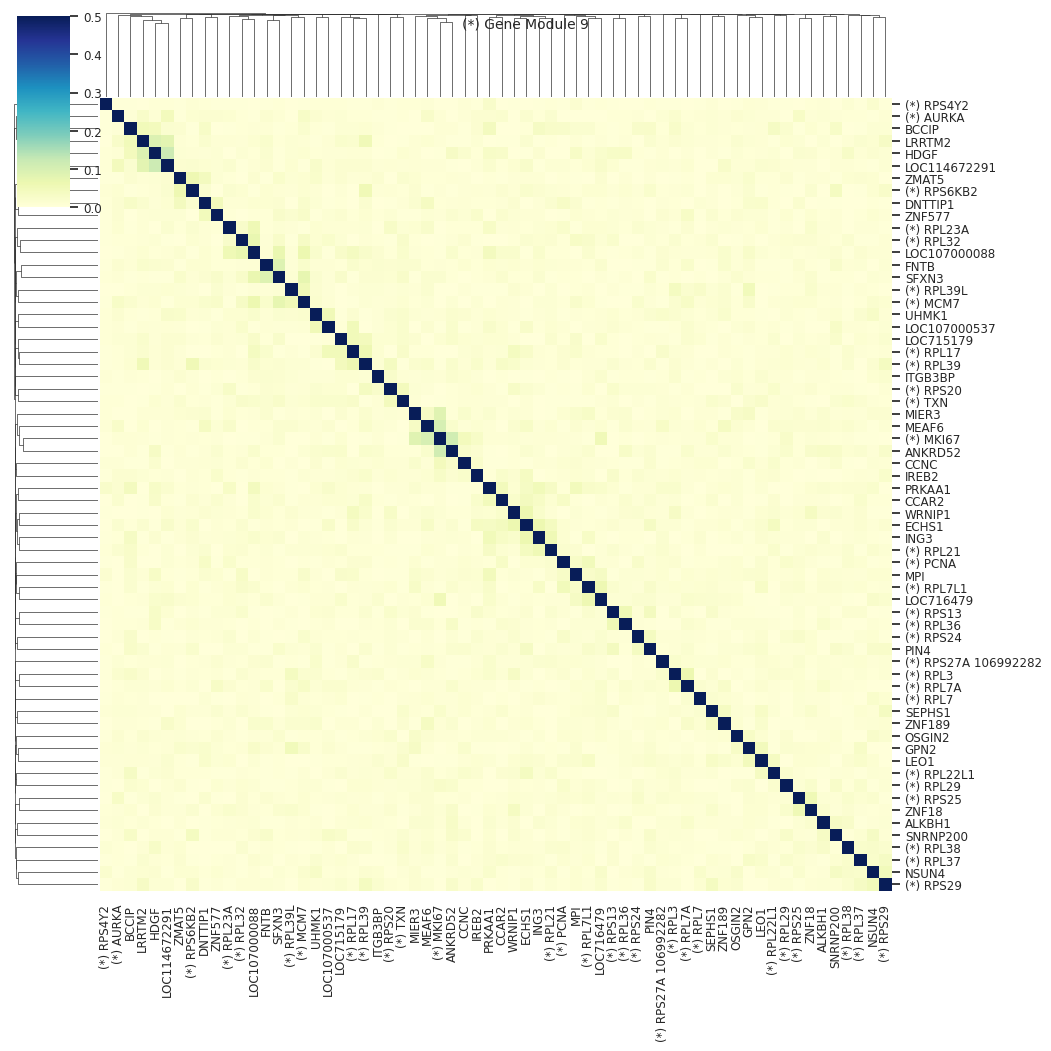

<Figure size 220x220 with 0 Axes>

<Figure size 340x340 with 0 Axes>

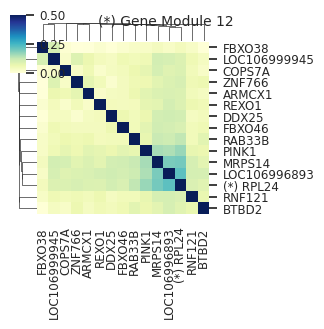

<Figure size 385x385 with 0 Axes>

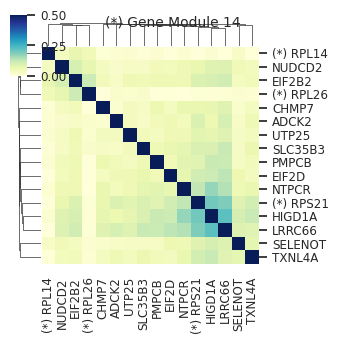

<Figure size 265x265 with 0 Axes>

<Figure size 520x520 with 0 Axes>

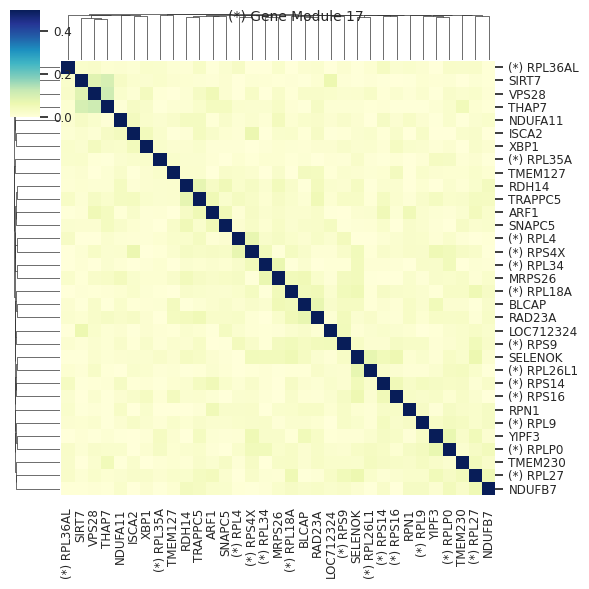

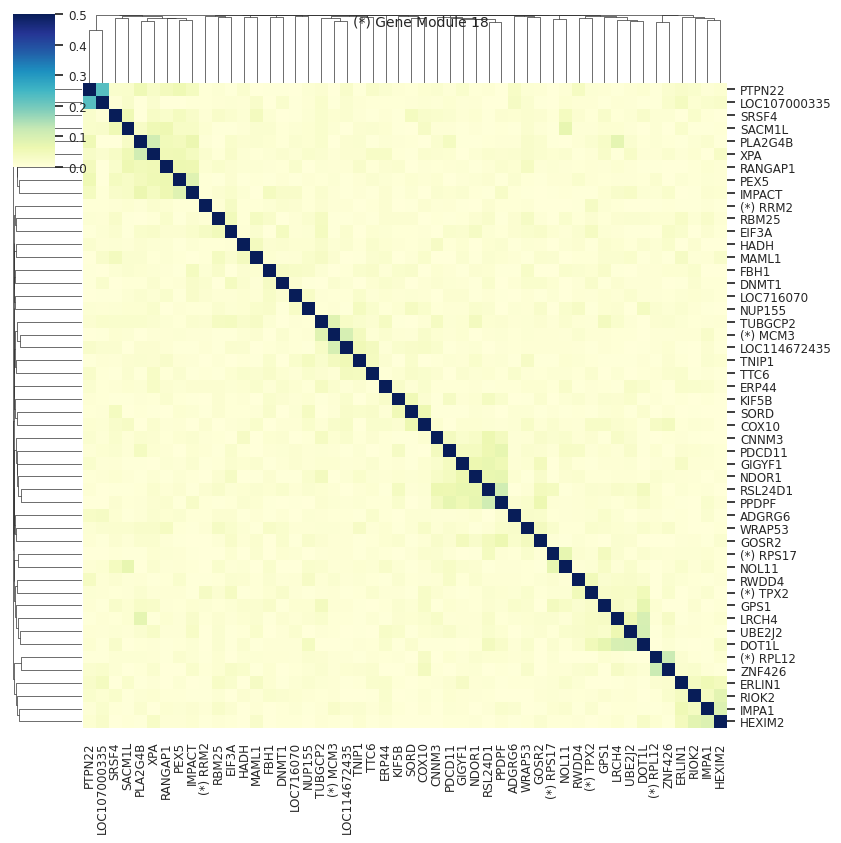

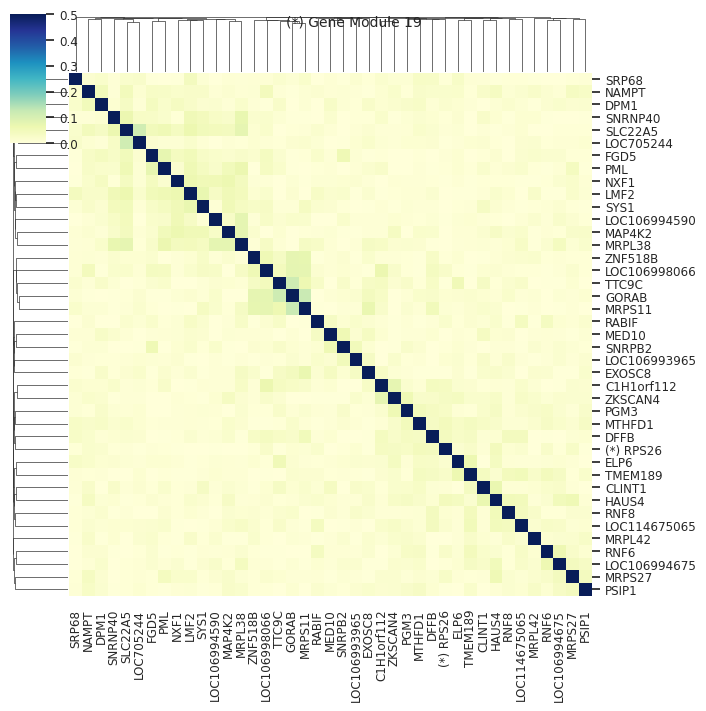

<Figure size 175x175 with 0 Axes>

<Figure size 805x805 with 0 Axes>

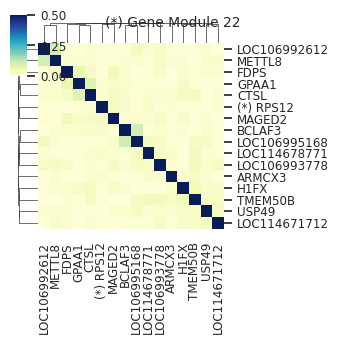

<Figure size 670x670 with 0 Axes>

<Figure size 175x175 with 0 Axes>

<Figure size 310x310 with 0 Axes>

<Figure size 835x835 with 0 Axes>

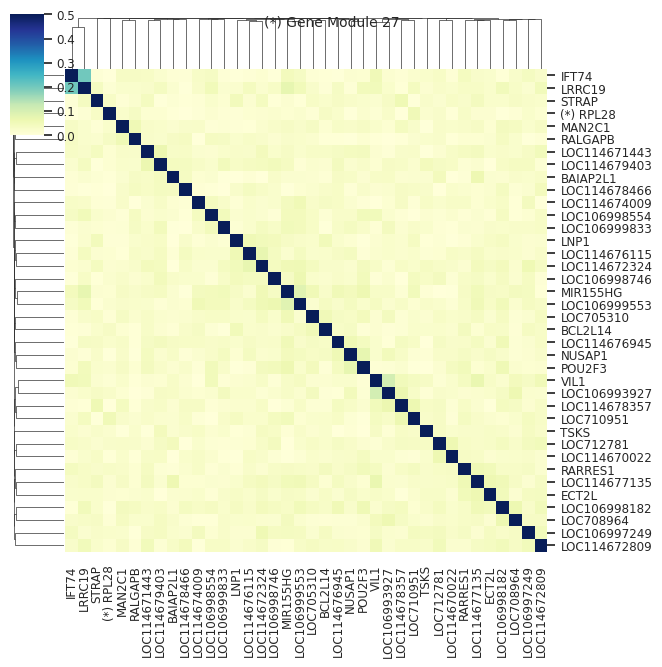

<Figure size 550x550 with 0 Axes>

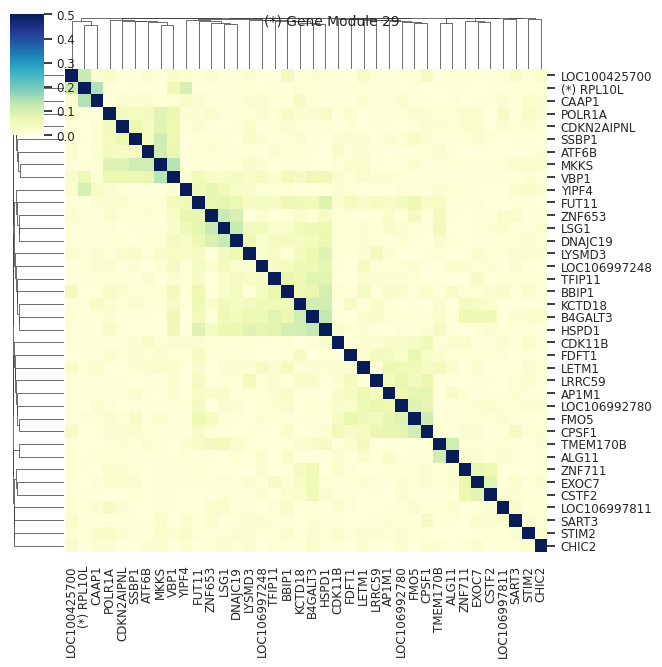

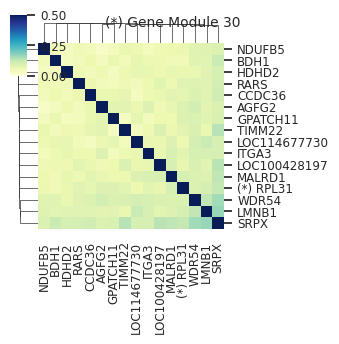

<Figure size 610x610 with 0 Axes>

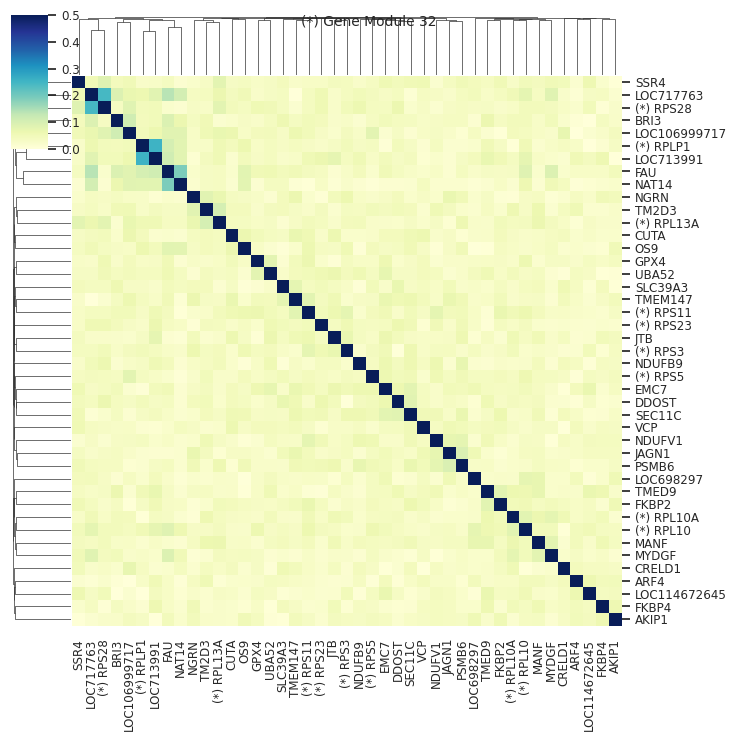

<Figure size 910x910 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 685x685 with 0 Axes>

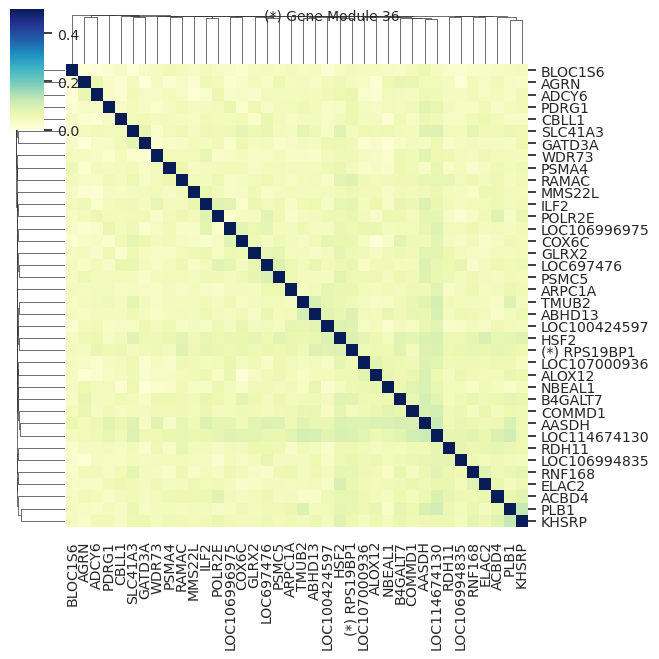

<Figure size 595x595 with 0 Axes>

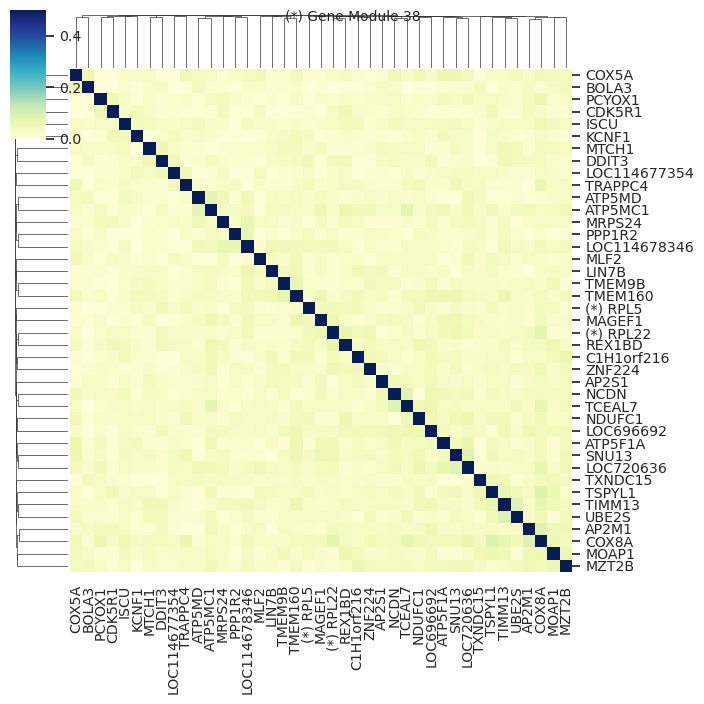

<Figure size 430x430 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 625x625 with 0 Axes>

<Figure size 565x565 with 0 Axes>

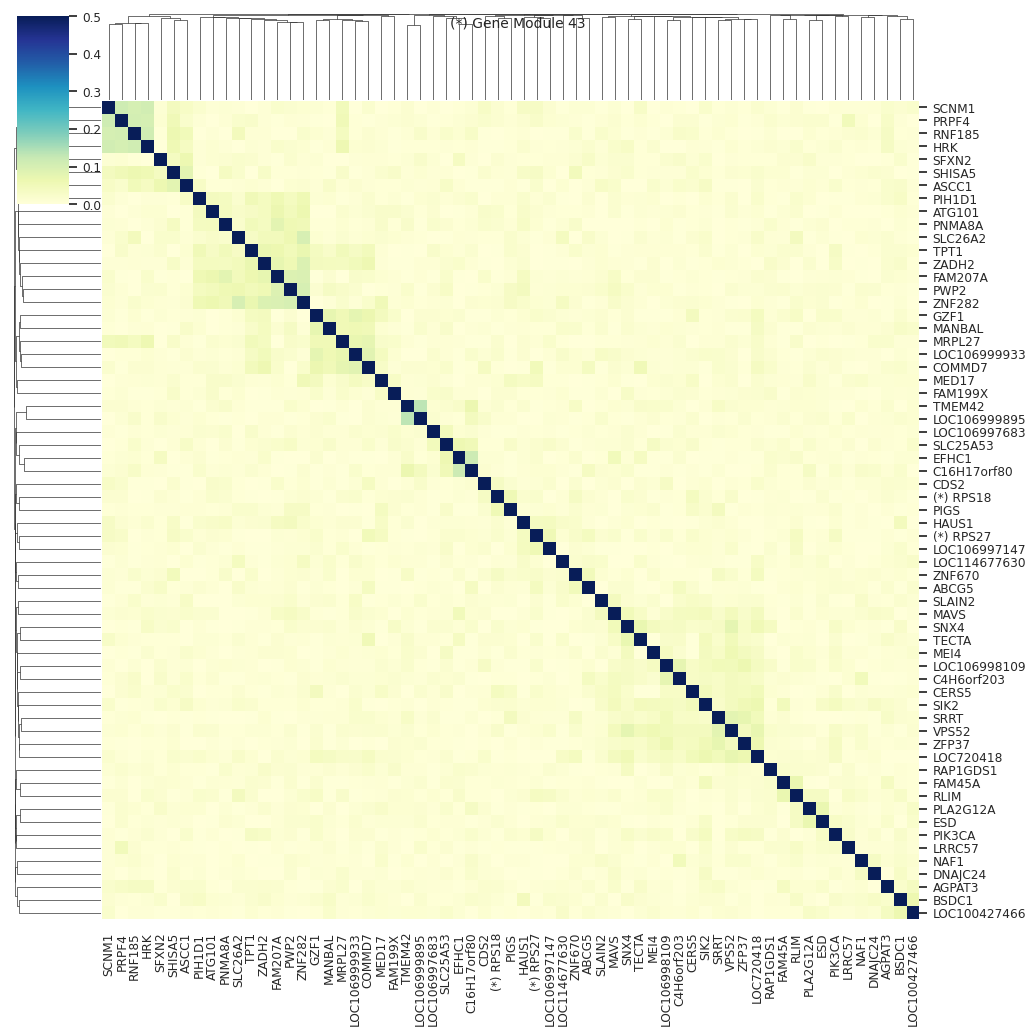

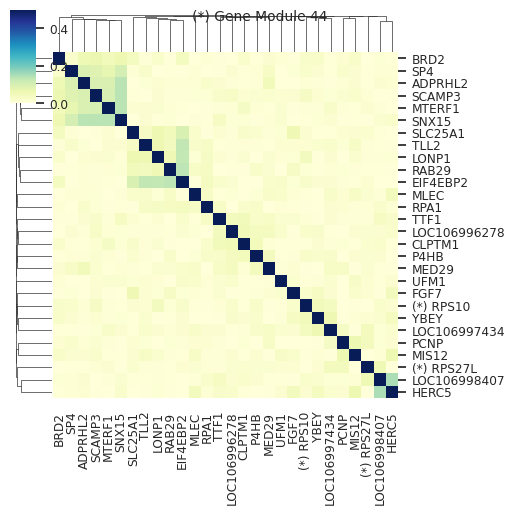

<Figure size 565x565 with 0 Axes>

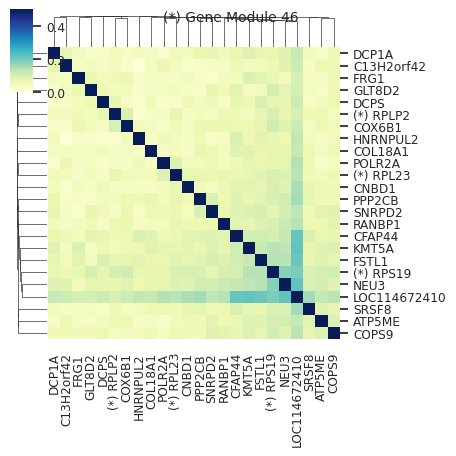

<Figure size 550x550 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 880x880 with 0 Axes>

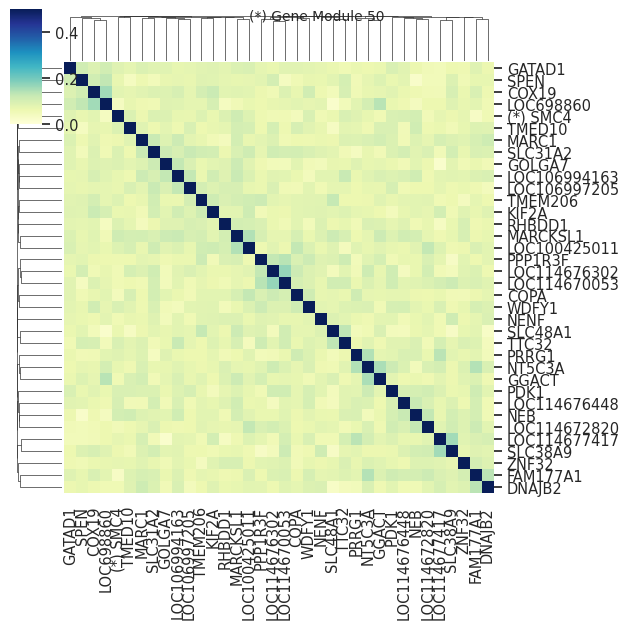

<Figure size 505x505 with 0 Axes>

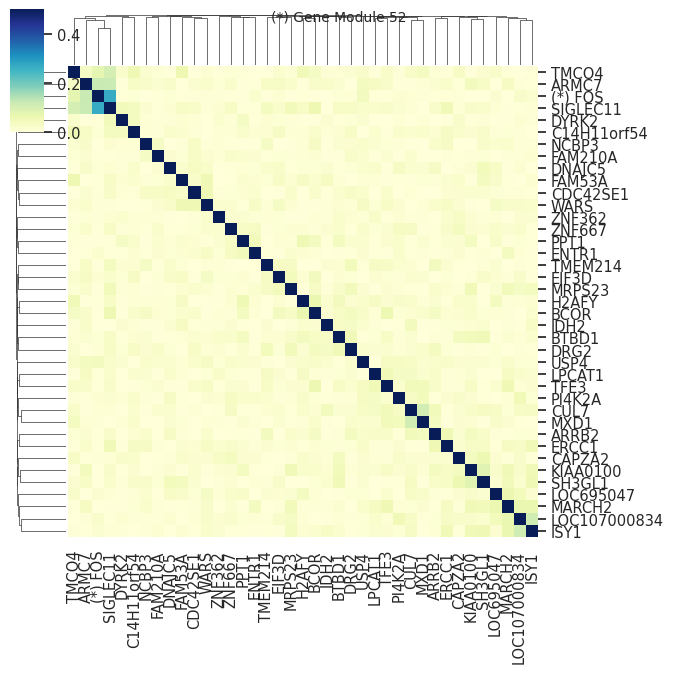

<Figure size 235x235 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 565x565 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 400x400 with 0 Axes>

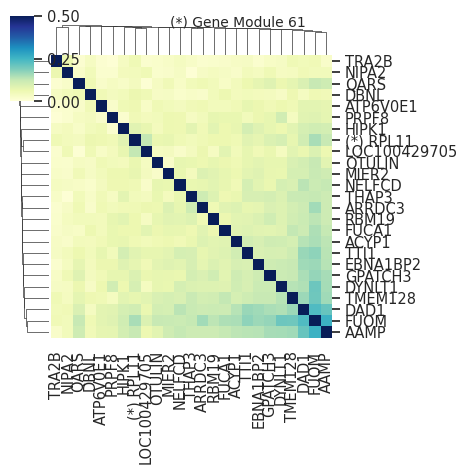

<Figure size 580x580 with 0 Axes>

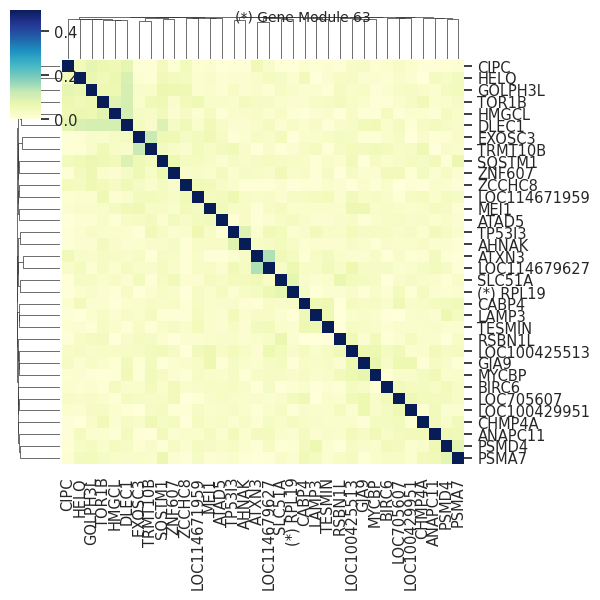

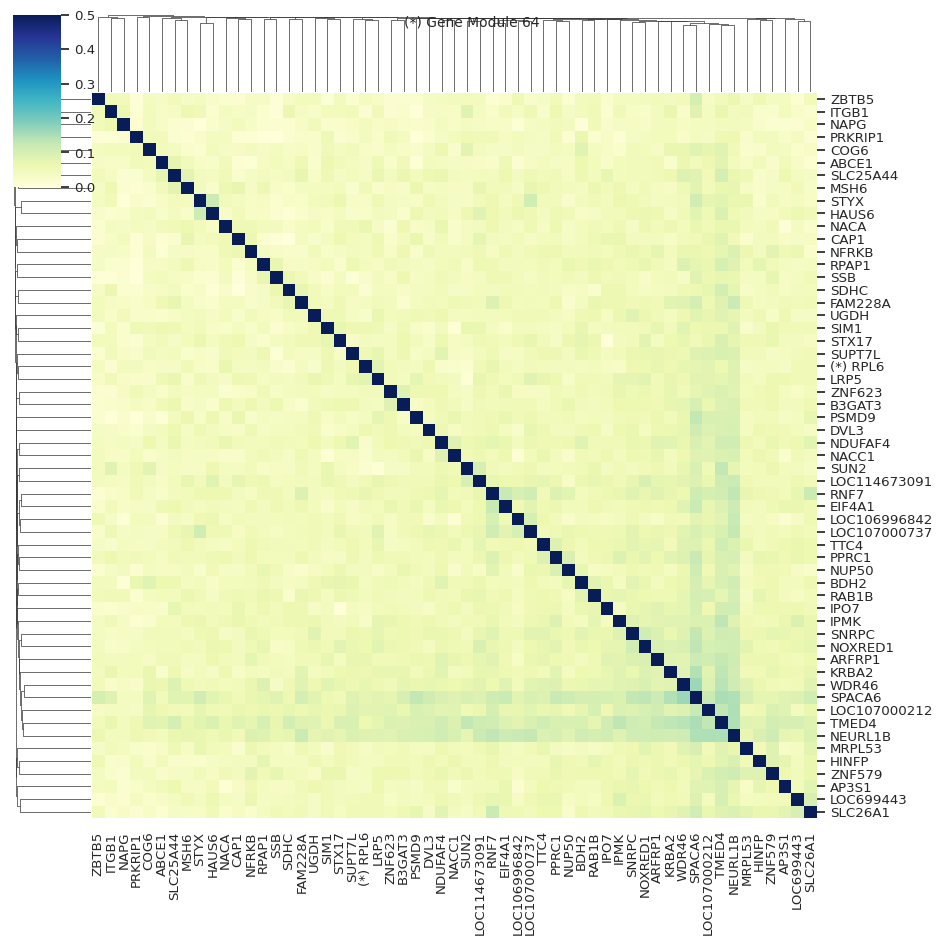

<Figure size 790x790 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 595x595 with 0 Axes>

<Figure size 430x430 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

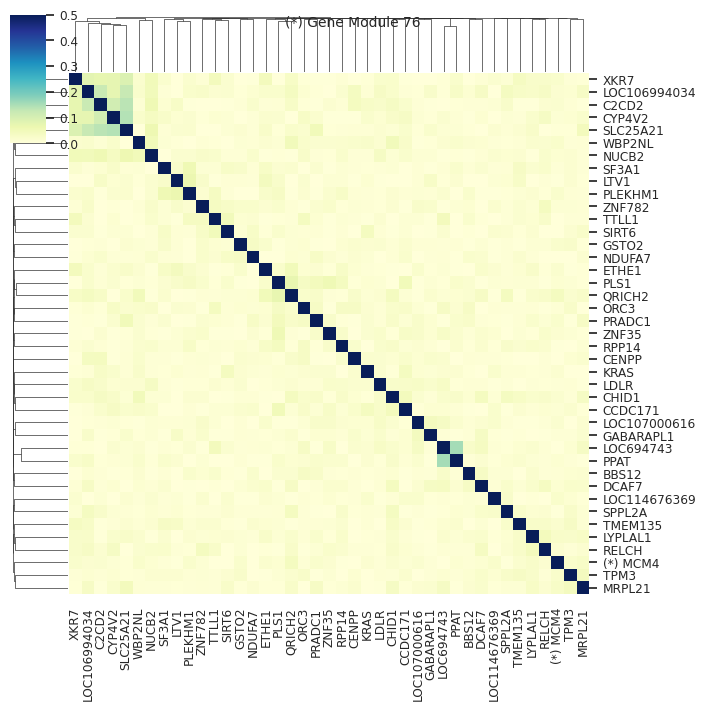

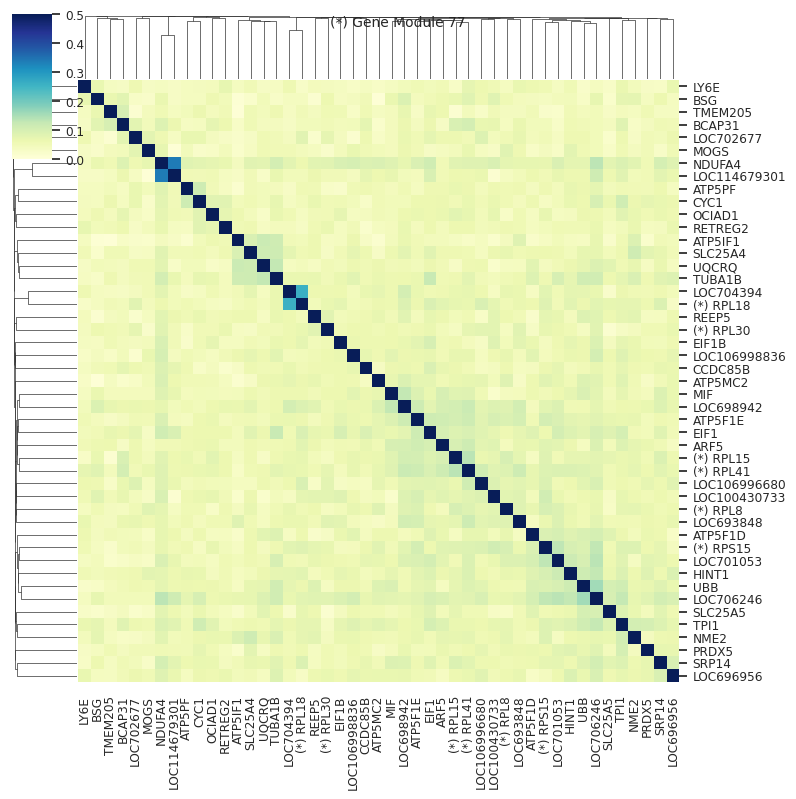

<Figure size 445x445 with 0 Axes>

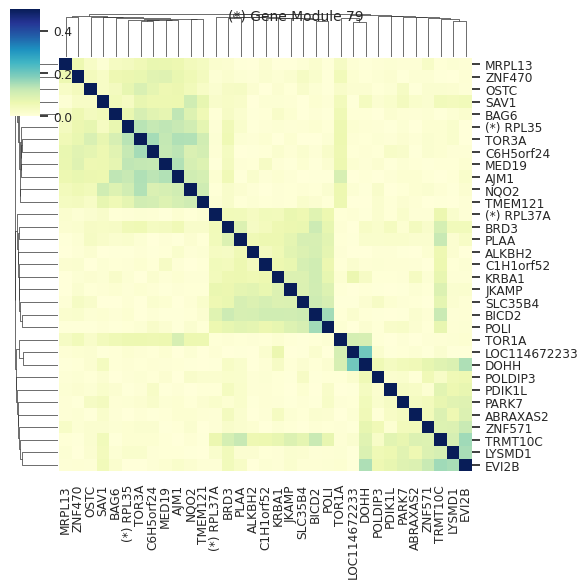

<Figure size 745x745 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 490x490 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 925x925 with 0 Axes>

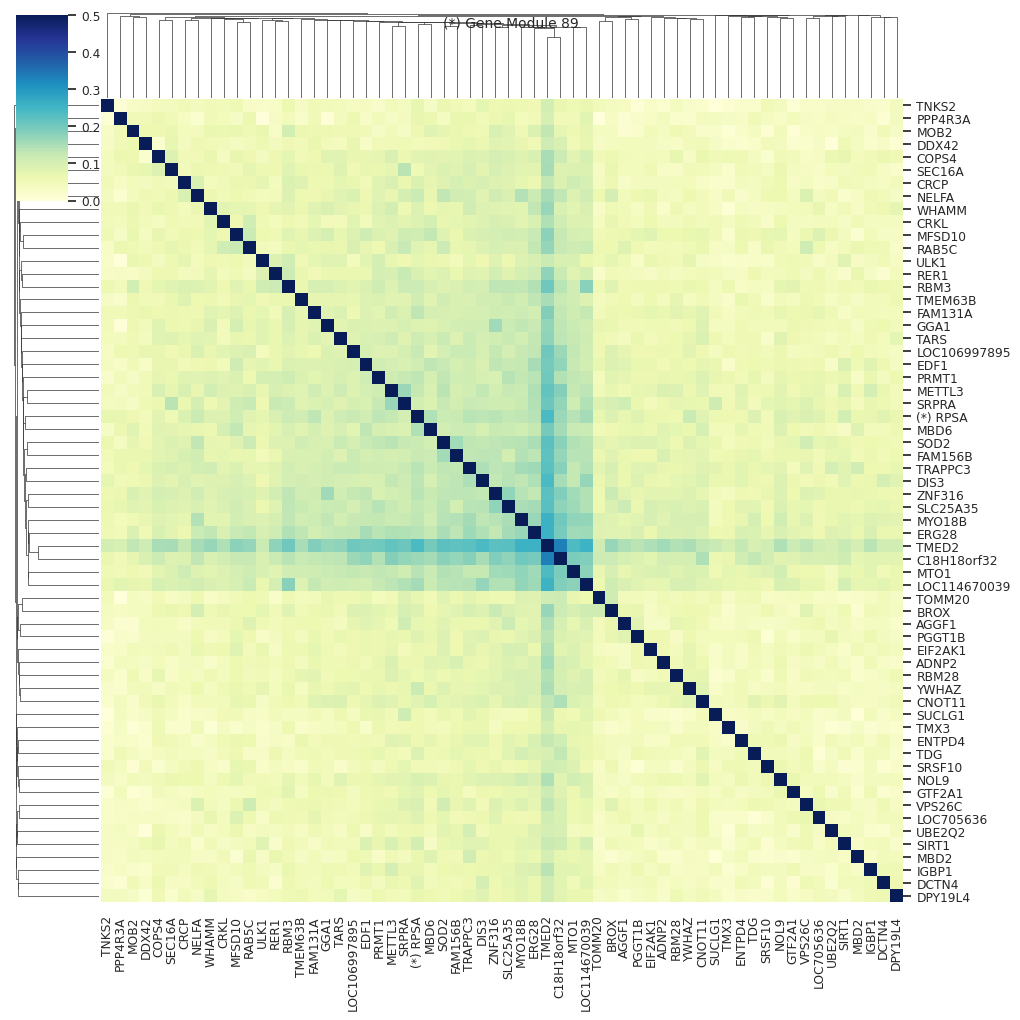

<Figure size 535x535 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 850x850 with 0 Axes>

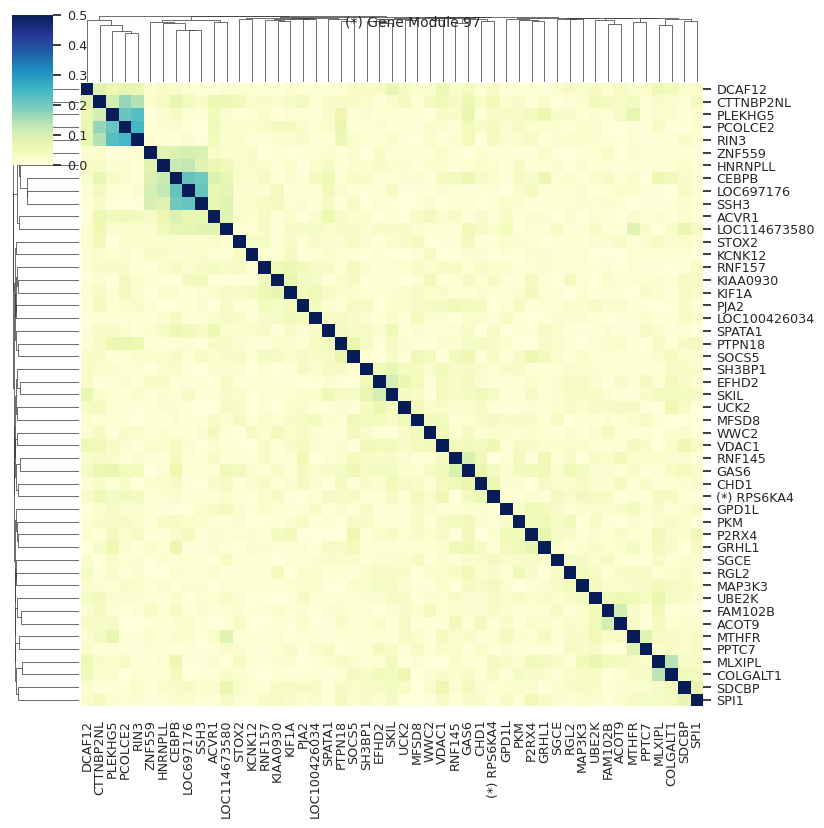

<Figure size 490x490 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 850x850 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 715x715 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 325x325 with 0 Axes>

<Figure size 955x955 with 0 Axes>

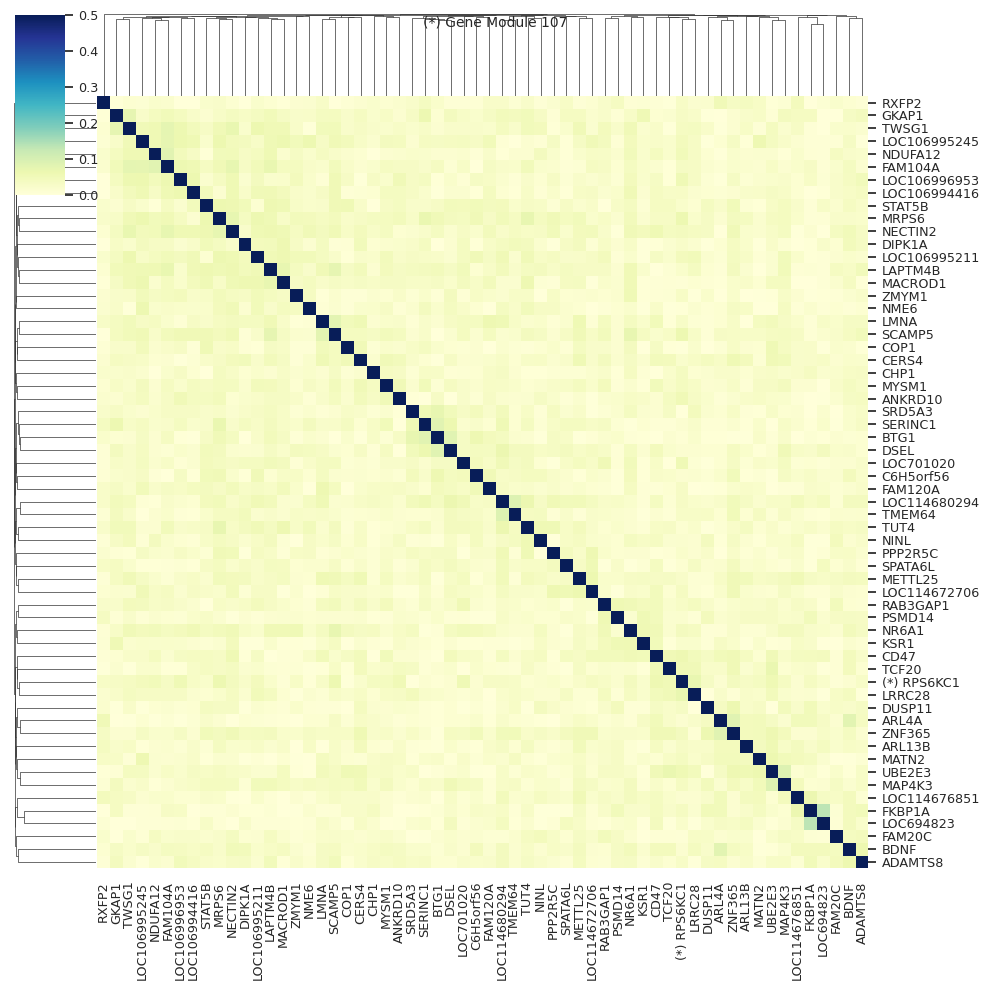

<Figure size 445x445 with 0 Axes>

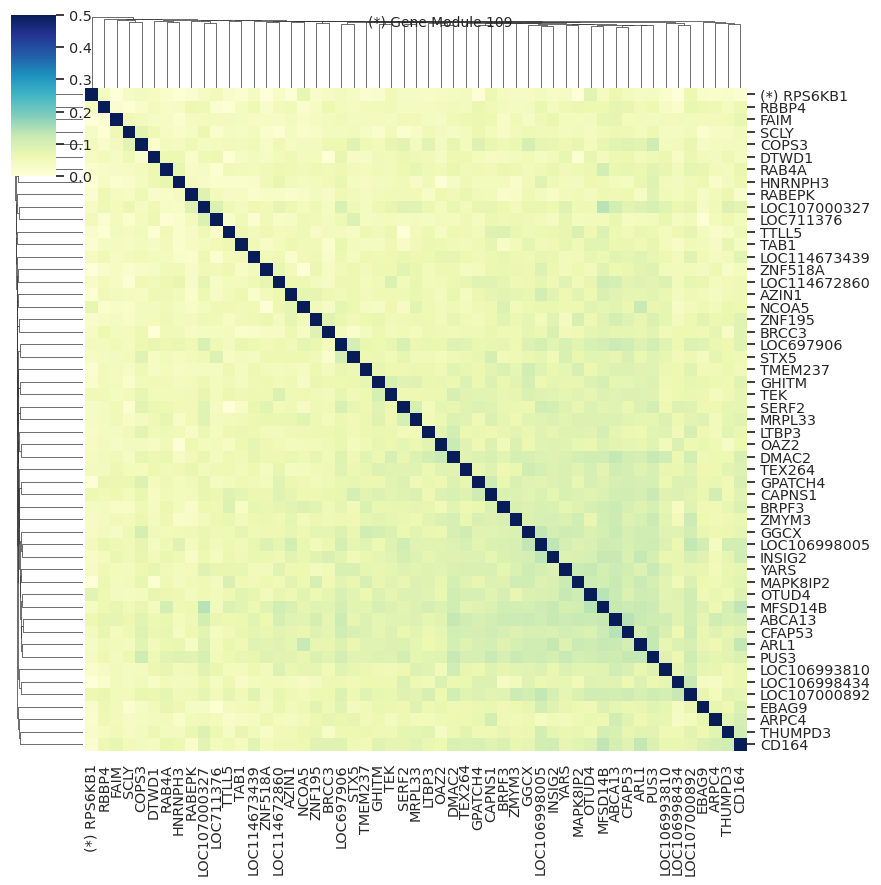

<Figure size 580x580 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 370x370 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 805x805 with 0 Axes>

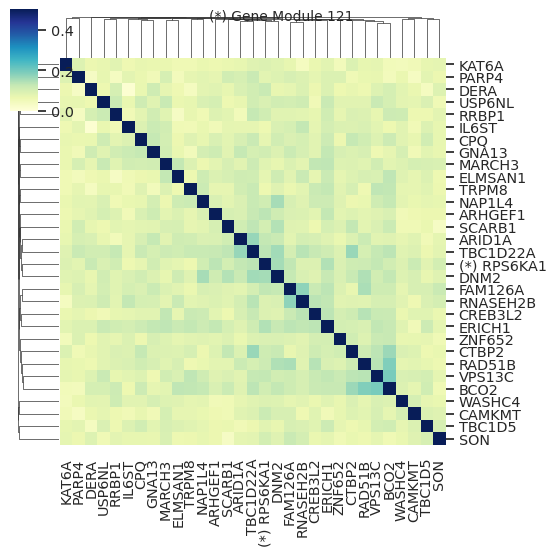

<Figure size 745x745 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 670x670 with 0 Axes>

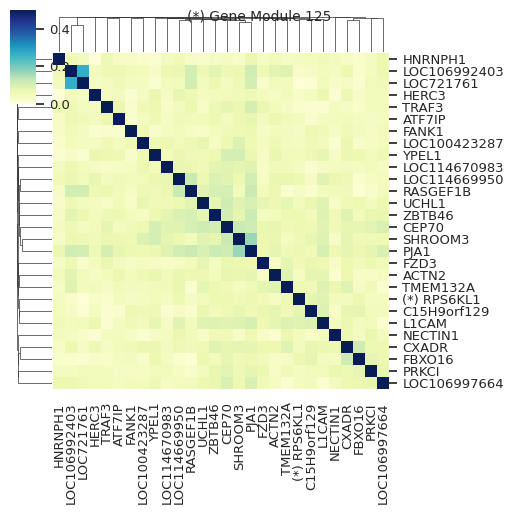

<Figure size 865x865 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

<Figure size 295x295 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 445x445 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 715x715 with 0 Axes>

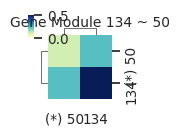

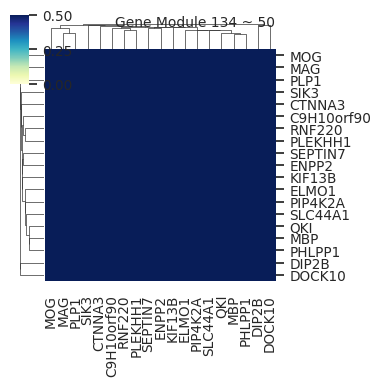

<Figure size 985x985 with 0 Axes>

<Figure size 910x910 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

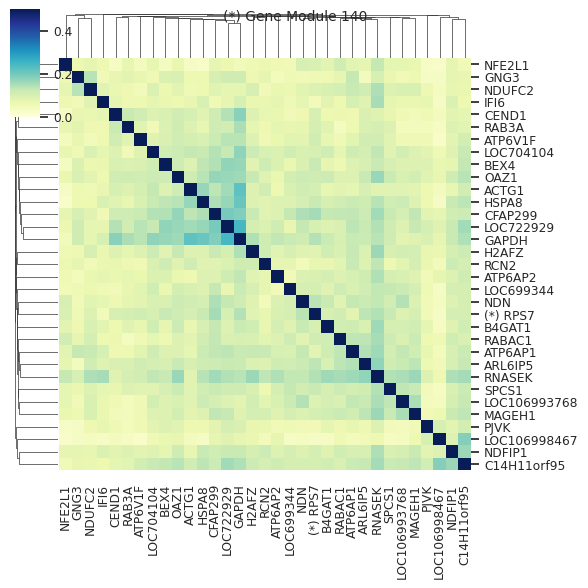

<Figure size 550x550 with 0 Axes>

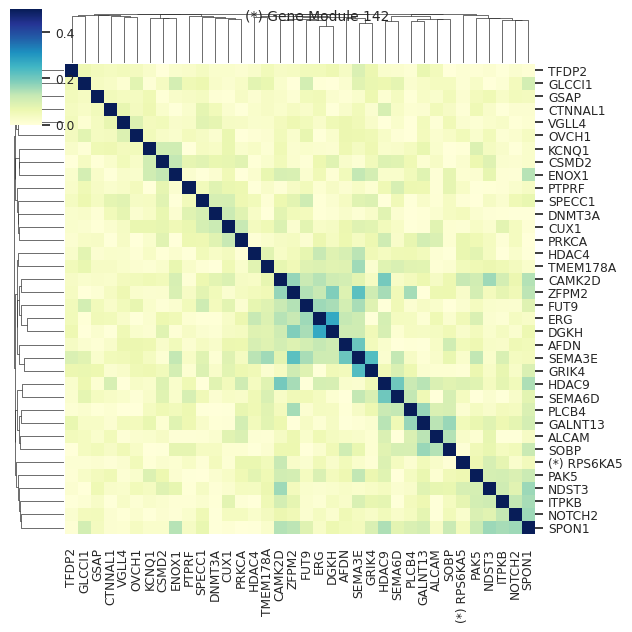

<Figure size 535x535 with 0 Axes>

<Figure size 370x370 with 0 Axes>

<Figure size 910x910 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 745x745 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 625x625 with 0 Axes>

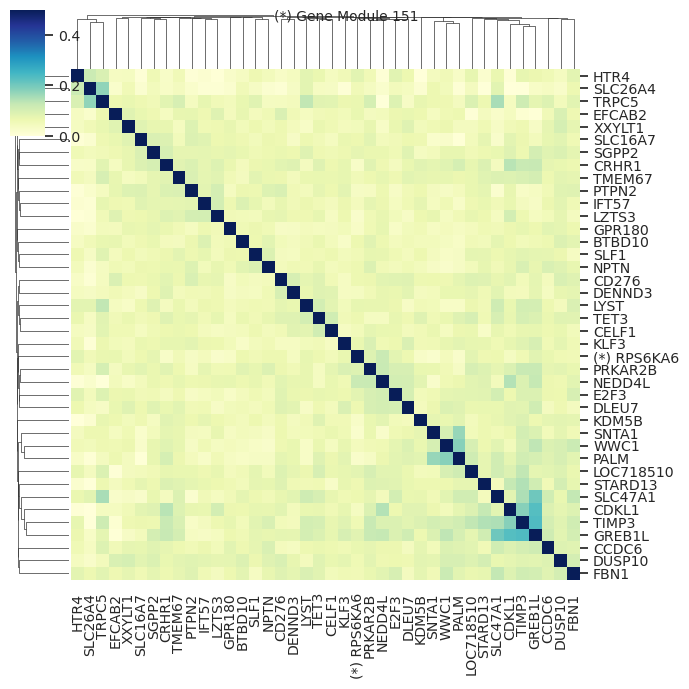

<Figure size 955x955 with 0 Axes>

<Figure size 280x280 with 0 Axes>

<Figure size 865x865 with 0 Axes>

<Figure size 625x625 with 0 Axes>

<Figure size 865x865 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 850x850 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 535x535 with 0 Axes>

<Figure size 745x745 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 430x430 with 0 Axes>

<Figure size 445x445 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 295x295 with 0 Axes>

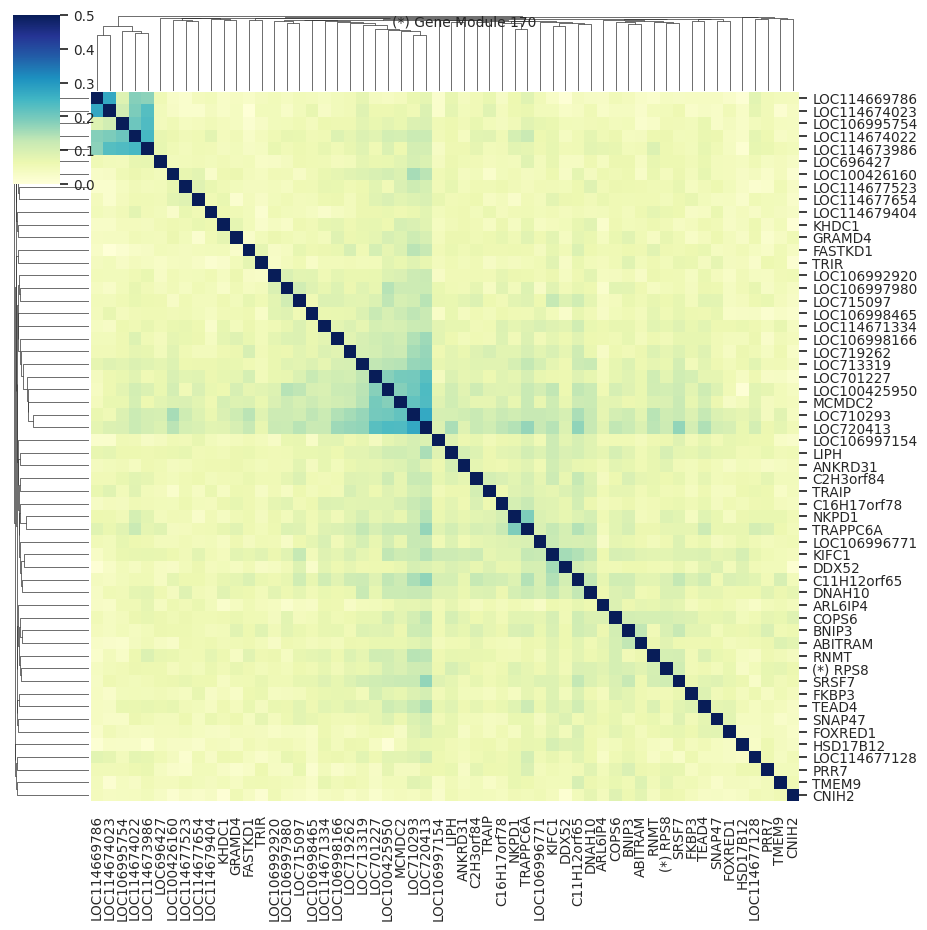

<Figure size 505x505 with 0 Axes>

<Figure size 1015x1015 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 745x745 with 0 Axes>

<Figure size 280x280 with 0 Axes>

<Figure size 985x985 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 430x430 with 0 Axes>

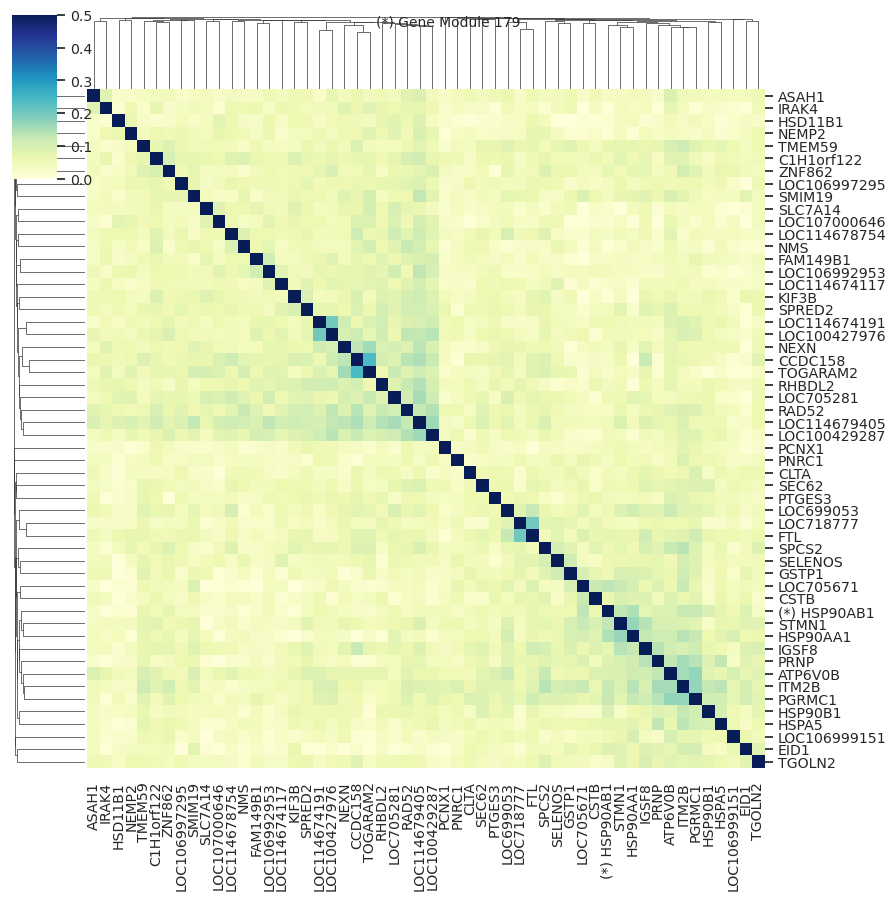

<Figure size 460x460 with 0 Axes>

<Figure size 910x910 with 0 Axes>

<Figure size 955x955 with 0 Axes>

<Figure size 370x370 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 565x565 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 505x505 with 0 Axes>

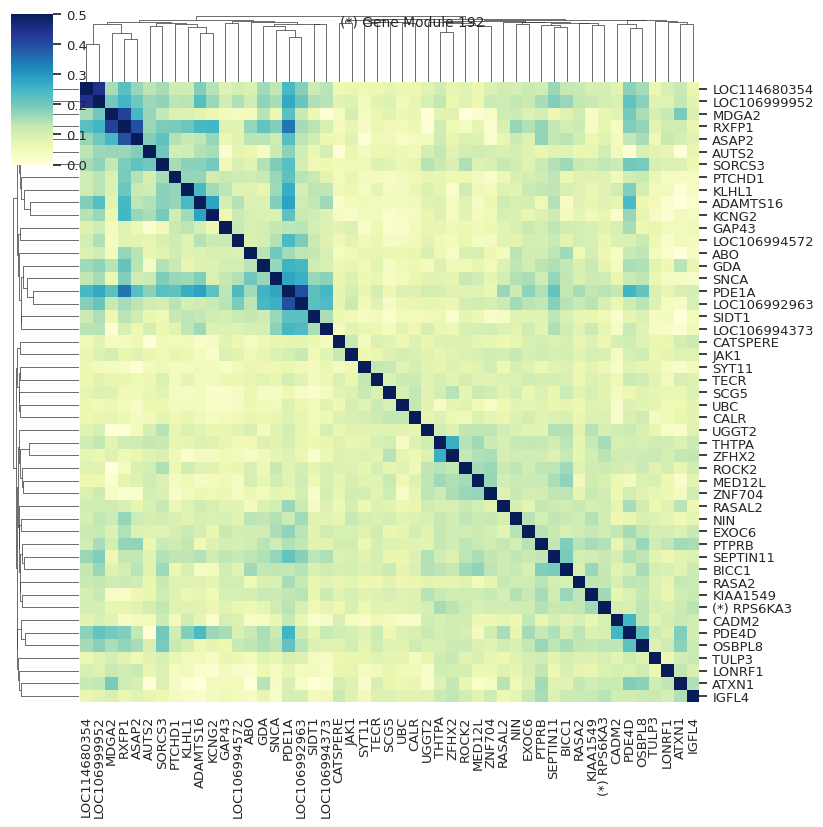

<Figure size 940x940 with 0 Axes>

<Figure size 610x610 with 0 Axes>

<Figure size 535x535 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 955x955 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 775x775 with 0 Axes>

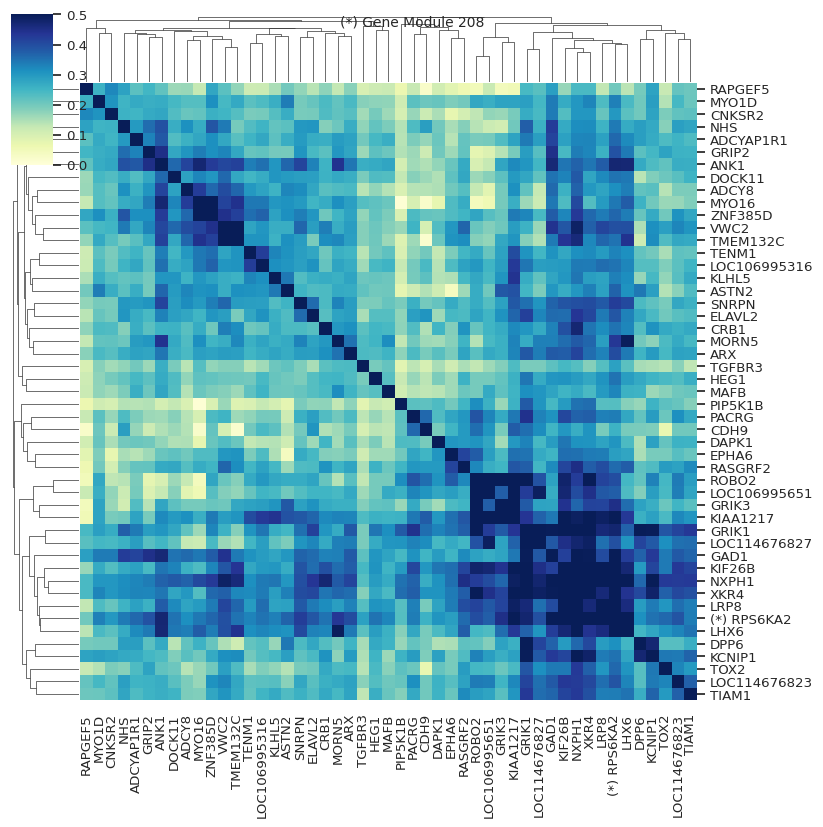

<Figure size 955x955 with 0 Axes>

<Figure size 955x955 with 0 Axes>

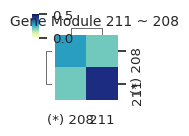

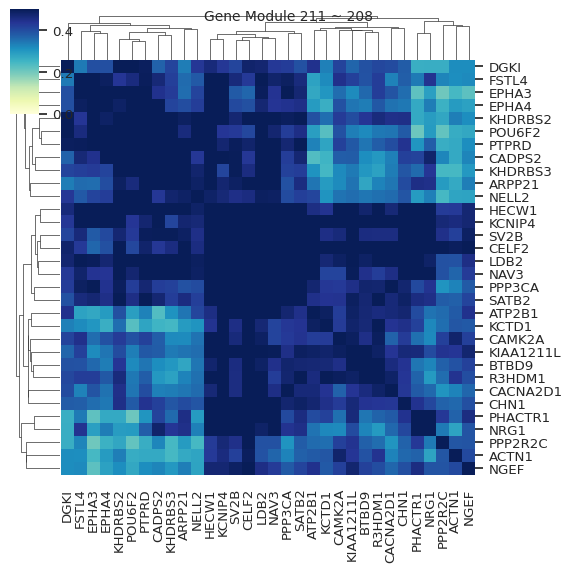

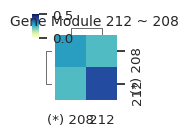

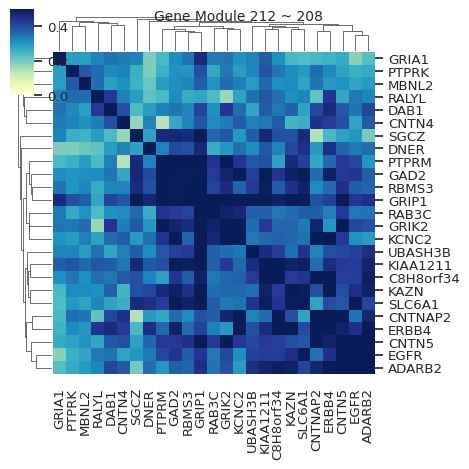

In [11]:
SHOW_CORRELATED_MODULES = 0.2 # Show non-lateral modules if correlated to lateral modules.
MIN_SIMILARITY_TO_SHOW = 0.2 # Show modules only if there's at least this correlation

base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = base_lateral_gene_modules[base_lateral_gene_modules >= 0]
similarity_of_genes = mc.ut.get_vv_frame(cells, "lateral_genes_similarity")

for gene_module in range(np.max(module_per_gene) + 1):
    module_genes_mask = module_per_gene.values == gene_module
    similarity_of_module = similarity_of_genes.loc[module_genes_mask, module_genes_mask]
    similarity_of_module.index = similarity_of_module.columns = [
        "(*) " + name if name in base_lateral_gene_names else name
        for name in similarity_of_module.index
    ]
    
    mask = similarity_of_module.values.copy()
    np.fill_diagonal(mask, 0.0)
    max_value = np.max(mask)
    show_in_notebook = gene_module in base_lateral_gene_modules or max_value >= MIN_SIMILARITY_TO_SHOW
 
    similarity_to_laterals = similarity_of_modules.iloc[gene_module, base_lateral_gene_modules]
    similar_lateral_modules_mask = similarity_to_laterals >= SHOW_CORRELATED_MODULES
    similar_lateral_modules = base_lateral_gene_modules[np.where(similar_lateral_modules_mask)[0]]
    if gene_module not in base_lateral_gene_modules and len(similar_lateral_modules) == 0:
        show_in_notebook = False
        
    prefix = "(*) " if gene_module in base_lateral_gene_modules else ""
    suffix = ", ".join([
        str(similar_lateral_module)
        for similar_lateral_module
        in similar_lateral_modules
        if similar_lateral_module != gene_module
    ])
    if suffix != "":
        suffix = " ~ " + suffix
    title = f"{prefix}Gene Module {gene_module}{suffix}"
        
    if len(similar_lateral_modules) > 0:
        with_lateral_modules = set(similar_lateral_modules)
        with_lateral_modules.add(gene_module)
        with_lateral_modules = sorted(with_lateral_modules)
        if len(with_lateral_modules) > 1:
            similarity_with_module = \
                similarity_of_modules.iloc[with_lateral_modules, :].iloc[:, with_lateral_modules]

            size = similarity_with_module.shape[0]
            if size > 50:
                sb.set(font_scale=50 / size)
            size = size * 0.15 + 1
            cm = sb.clustermap(
                similarity_with_module,
                figsize=(size, size),
                vmin=0, vmax=0.5,
                xticklabels=True, yticklabels=True,
                dendrogram_ratio=0.1,
                cmap="YlGnBu",
            )
            cm.fig.suptitle(title, fontsize=10)
            if show_in_notebook:
                plt.show()
            else:
                plt.clf()

    size = similarity_of_module.shape[0]
    if size > 50:
        sb.set(font_scale=50 / size)
    size = size * 0.15 + 1
    cm = sb.clustermap(
        similarity_of_module,
        figsize=(size, size),
        vmin=0, vmax=0.5,
        xticklabels=True, yticklabels=True,
        dendrogram_ratio=0.1,
        cmap="YlGnBu",
    )
    cm.fig.suptitle(title, fontsize=10)
    if show_in_notebook:
        plt.show()
    else:
        plt.clf()

In [12]:
','.join(module_per_gene[module_per_gene == 134].index.values)

'RNF220,ELMO1,SEPTIN7,QKI,MOG,PLEKHH1,KIF13B,ENPP2,PIP4K2A,CTNNA3,C9H10orf90,DIP2B,DOCK10,SIK3,SLC44A1,MBP,PHLPP1,MAG,PLP1'

In [13]:
LATERAL_GENE_MODULES = [
   # nothing to remove
]
SPECIFIC_LATERAL_GENES = ["DUSP1"]  # Stress

In [14]:
for gene_module in LATERAL_GENE_MODULES:
    module_genes_mask = module_per_gene == gene_module
    update_lateral_genes(names=cells.var_names[module_genes_mask], op="add", show=False)
update_lateral_genes(names=SPECIFIC_LATERAL_GENES, op="add", show=False)


set macaque_mtg_iteration1.var[lateral_gene]: 105 true (0.3322%) out of 31604 bools


In [15]:
# Either use the guesstimator:
max_parallel_piles = mc.pl.guess_max_parallel_piles(cells)
# Or, if running out of memory manually override:
# max_paralle_piles = ...
print(max_parallel_piles)
mc.pl.set_max_parallel_piles(max_parallel_piles)

371


In [16]:
with mc.ut.progress_bar():
    mc.pl.divide_and_conquer_pipeline(cells, random_seed=123456, )

Detect rare gene modules...
  0%|          [00:00]/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/

In [17]:
metacells = mc.pl.collect_metacells(cells, name="macaque_mtg_metacells", random_seed=123456)
print(f"Iteration 1: {metacells.n_obs} metacells, {metacells.n_vars} genes")

set macaque_mtg_metacells.obs[grouped]: 3934 int64s
set macaque_mtg_metacells.obs[total_umis]: 3934 int64s
set macaque_mtg_metacells.layers[total_umis]: ndarray 3934 X 31604 float32s
set macaque_mtg_metacells.obs[__zeros_downsample_umis]: 3934 int64s
set macaque_mtg_metacells.layers[zeros]: ndarray 3934 X 31604 int32s
set macaque_mtg_iteration1.obs[metacell_name]: 89136 <U8s
set macaque_mtg_metacells.var[name]: 31604 objects
set macaque_mtg_metacells.var[bursty_lonely_gene]: 0 true (0%) out of 31604 bools
set macaque_mtg_metacells.var[properly_sampled_gene]: 31604 true (100%) out of 31604 bools
set macaque_mtg_metacells.var[excluded_gene]: 0 true (0%) out of 31604 bools
set macaque_mtg_metacells.var[full_gene_index]: 31604 int32s
set macaque_mtg_metacells.var[lateral_gene]: 105 true (0.3322%) out of 31604 bools
set macaque_mtg_metacells.var[lateral_genes_module]: 31604 int32s
set macaque_mtg_metacells.var[selected_gene]: 8367 true (26.47%) out of 31604 bools
set macaque_mtg_metacells.v

Iteration 1: 3934 metacells, 31604 genes


In [22]:
metacells

AnnData object with n_obs × n_vars = 3934 × 31604
    obs: 'grouped', 'total_umis', '__zeros_downsample_umis', 'metacells_rare_gene_module', 'rare_metacell', 'cell_type', 'cell_type_fraction_of_L2/3-6 intratelencephalic projecting glutamatergic cortical neuron', 'cell_type_fraction_of_L5 extratelencephalic projecting glutamatergic cortical neuron', 'cell_type_fraction_of_L6b glutamatergic cortical neuron', 'cell_type_fraction_of_astrocyte of the cerebral cortex', 'cell_type_fraction_of_caudal ganglionic eminence derived GABAergic cortical interneuron', 'cell_type_fraction_of_cerebral cortex endothelial cell', 'cell_type_fraction_of_chandelier pvalb GABAergic cortical interneuron', 'cell_type_fraction_of_corticothalamic-projecting glutamatergic cortical neuron', 'cell_type_fraction_of_lamp5 GABAergic cortical interneuron', 'cell_type_fraction_of_microglial cell', 'cell_type_fraction_of_near-projecting glutamatergic cortical neuron', 'cell_type_fraction_of_oligodendrocyte', 'cell_type_fr

## Add subclass annotation 

In [23]:
# We'll reuse this through the iterations.
def convey_cell_annotations_to_metacells(anno_col, anno_col_target) -> None:
    
    # Assign a single value for each metacell based on the cells.
    mc.tl.convey_obs_to_group(
        adata=cells, gdata=metacells,
        property_name=anno_col, to_property_name=anno_col_target,
        method=mc.ut.most_frequent  # This is the default, for categorical data
    )

    # Compute the fraction of cells with each possible value in each metacell:
    mc.tl.convey_obs_fractions_to_group(
        adata=cells, gdata=metacells,
        property_name=anno_col, to_property_name=anno_col_target,
    )

    
convey_cell_annotations_to_metacells(anno_col='Subclass', anno_col_target='Subclass')

set macaque_mtg_metacells.obs[Subclass]: 3934 <U10s
set macaque_mtg_metacells.obs[Subclass_fraction_of_Astro]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_Chandelier]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_Endo]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L2/3 IT]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L4 IT]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L5 ET]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L5 IT]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L5/6 NP]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L6 CT]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L6 IT]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L6 IT Car3]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_L6b]: 3934 float64s
set macaque_mtg_metacells.obs[Subclass_fraction_of_Lamp5]: 39

In [24]:
cells

AnnData object with n_obs × n_vars = 89136 × 31604
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', '...1', 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_id', 'excluded_umis', 'properly_sampled_cell', 'excluded_cell', 'full_cell_index', 'metacell', 'dissolved', 'metacell_level', 'cells_rare_gene_module', 'rare_cell', 'metacell_name'
    var: 'name', 'bursty_lonely_gene', 'properly_sampled_gene', 'excluded_gene', 'full_gene_index', 'lateral_gene', 'lateral_genes_module', 'selected_gene', 'rare_gene', 'rare_gene_module'
    uns: '__name__'
    varp: 'lateral_genes

In [25]:
set(metacells.obs.Subclass.astype('category').cat.categories).symmetric_difference(set(cells.obs.Subclass.cat.categories))

set()

In [26]:
metacells.write("macaque_metacells_subclass.h5ad")

In [27]:
import gc
gc.collect()

972

In [28]:
cells.write("macaque_single_cell_with_metacells.h5ad")

In [29]:
cl_tbl = cells.obs[['Subclass', 'cell_type', 'cell_type_ontology_term_id', 'tissue', 'tissue_ontology_term_id']].reset_index(drop=True).drop_duplicates(subset=['Subclass'])

In [30]:
cl_tbl.Subclass.cat.categories

Index(['Astro', 'Chandelier', 'Endo', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5_Lhx6',
       'Micro-PVM', 'OPC', 'Oligo', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
       'Sst Chodl', 'VLMC', 'Vip'],
      dtype='object')